<a href="https://colab.research.google.com/github/UnitForDataScience/ML-DL-Open-Lab-Series/blob/main/Supervised_Learning_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🎗️ PREDICTING BREAST CANCER USING MACHINE LEARNING**

## **Problem Definition**
Breast cancer is a major health concern for women, with timely diagnosis being key to effective treatment outcomes. Unfortunately, not every case is detected early, which can result in loss of life. Globally, breast cancer is the most commonly diagnosed cancer and the leading cause of cancer-related deaths among women. In 2020, there were approximately **2.3 million new cases of breast cancer**, making up **one-fourth** of all new cancer cases, and **685,000 deaths**, accounting for **one-sixth** of all cancer-related fatalities. The highest incidence rates were observed in **Australia/New Zealand (95.5 per 100,000 people)**, **Western Europe (90.7)**, and **Northern America (89.4)**. The lowest incidence rates were recorded in **South-Central Asia (26.2)**, **Middle and Eastern Africa (33)**, and **Central America (39.5)**.

In the U.S., approximately **240,000 women** and **2,100 men** are diagnosed with breast cancer every year. Early detection and accurate diagnosis are crucial in improving survival rates.

## **Dataset Description**
The **Wisconsin Diagnostic Breast Cancer (WDBC) Dataset** was developed by the **University of Wisconsin Hospital** to differentiate between benign and malignant breast tumors. This dataset is derived from digitized images of fine needle aspirates (FNA) from breast masses and quantifies various characteristics of the cell nuclei found within these images.

### **📊 Variables in Dataset**
1. **ID Number** – A unique identifier for each case.
2. **Diagnosis** – The outcome of tumor analysis:
   - 'M' = Malignant
   - 'B' = Benign

For each cell nucleus in the image, **ten real-valued features** are computed in **three different dimensions**—mean, standard error, and "worst" (the mean of the three largest values). These features include:

3. **Radius** – The average distance from the center to the perimeter.
4. **Texture** – The standard deviation of the grayscale values.
5. **Perimeter** – The length of the outside border of the nucleus.
6. **Area** – The space enclosed by the perimeter.
7. **Smoothness** – Variation in the radius lengths.
8. **Compactness**
9. **Concavity** – Severity of concave portions of the contour.
10. **Concave points** – Number of concave portions of the contour.
11. **Symmetry** – Symmetry of the nucleus.
12. **Fractal dimension** – The "coastline approximation" minus 1.

## **Task Objective**
- **Supervised Classification Task**: The goal is to develop a **binary classification model** to predict whether a tumor is **malignant ('M')** or **benign ('B')** based on cell nucleus characteristics.
- The model will be trained using **machine learning classifiers** and evaluated based on accuracy, precision, recall, and F1-score.

## **Steps in the Project**
1. **Data Preprocessing**:
   - Handle missing or incorrect values (if applicable).
   - Standardize numerical features for better model performance.
   
2. **Exploratory Data Analysis (EDA)**:
   - Visualize feature distributions.
   - Analyze correlations between features and the target variable.

3. **Model Training and Evaluation**:
   - Train a **Logistic Regression** model as a baseline.
   - Train advanced models such as **Decision Trees, Support Vector Machines, and Random Forest** to improve accuracy.
   - Compare models using classification metrics.

4. **Result Interpretation**:
   - Present accuracy, confusion matrices, and classification reports.
   - Discuss which model performs best and why.

5. **Deploy Model**:
   - Save the trained model for future use.

---

✅ **Expected Outcome**: machine learning models that can **effectively predict breast cancer** based on patient features, aiding in early diagnosis and intervention.

🚀 **Next Step**: Let's preprocess the data and start building the models!


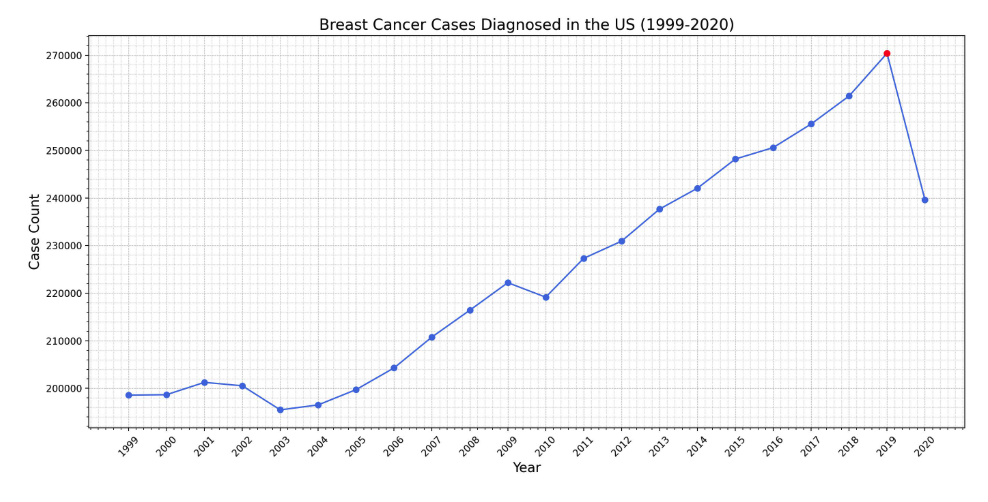

In [41]:
### data manupulation
import pandas as pd
import numpy as np

### data visisualization
import matplotlib.pyplot as plt
import seaborn as sns


### modeling and metrics
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## Load Data

In [42]:
### mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

In [43]:
#df = pd.read_csv('/content/drive/MyDrive/Projects /Diabetics/diabetes.csv')
df = pd.read_csv('https://raw.githubusercontent.com/UnitForDataScience/ML-DL-Open-Lab-Series/refs/heads/main/Open%20Lab%202/breast_cancer.csv')
df

radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
3      11.42     20.38       77.58   386.1      0.14250       0.28390   
4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
..       ...       ...         ...     ...          ...           ...   
564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
566    16.60     28.08      108.30   858.1      0.08455       0.10230   
567    20.60     29.33      140.10  1265.0      0.11780       0.27700   
568     7.76     24.54       47.92   181.0      0.05263       0.04362   

     concavity1  concave_points1  symmetry1  fractal_dimension1  ...  \
0       0.30010          0.14710     0.2419             0.07871  ...   
1       0.08690          0.07017     0.1812             0.05667  ...   
2       0.19740          0.12790     0.2069             0.05999  ...   
3       0.24140          0.10520     0.2597             0.09744  ...   
4       0.19800          0.10430     0.1809             0.05883  ...   
..          ...              ...        ...                 ...  ...   
564     0.24390          0.13890     0.1726             0.05623  ...   
565     0.14400          0.09791     0.1752             0.05533  ...   
566     0.09251          0.05302     0.1590             0.05648  ...   
567     0.35140          0.15200     0.2397             0.07016  ...   
568     0.00000          0.00000     0.1587             0.05884  ...   

     texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0       17.33      184.60  2019.0      0.16220       0.66560      0.7119   
1       23.41      158.80  1956.0      0.12380       0.18660      0.2416   
2       25.53      152.50  1709.0      0.14440       0.42450      0.4504   
3       26.50       98.87   567.7      0.20980       0.86630      0.6869   
4       16.67      152.20  1575.0      0.13740       0.20500      0.4000   
..        ...         ...     ...          ...           ...         ...   
564     26.40      166.10  2027.0      0.14100       0.21130      0.4107   
565     38.25      155.00  1731.0      0.11660       0.19220      0.3215   
566     34.12      126.70  1124.0      0.11390       0.30940      0.3403   
567     39.42      184.60  1821.0      0.16500       0.86810      0.9387   
568     30.37       59.16   268.6      0.08996       0.06444      0.0000   

     concave_points3  symmetry3  fractal_dimension3  Diagnosis  
0             0.2654     0.4601             0.11890          1  
1             0.1860     0.2750             0.08902          1  
2             0.2430     0.3613             0.08758          1  
3             0.2575     0.6638             0.17300          1  
4             0.1625     0.2364             0.07678          1  
..               ...        ...                 ...        ...  
564           0.2216     0.2060             0.07115          1  
565           0.1628     0.2572             0.06637          1  
566           0.1418     0.2218             0.07820          1  
567           0.2650     0.4087             0.12400          1  
568           0.0000     0.2871             0.07039          0  

[569 rows x 31 columns]

In [44]:
df.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [46]:
df.isnull().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64

In [47]:
features = ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3',]

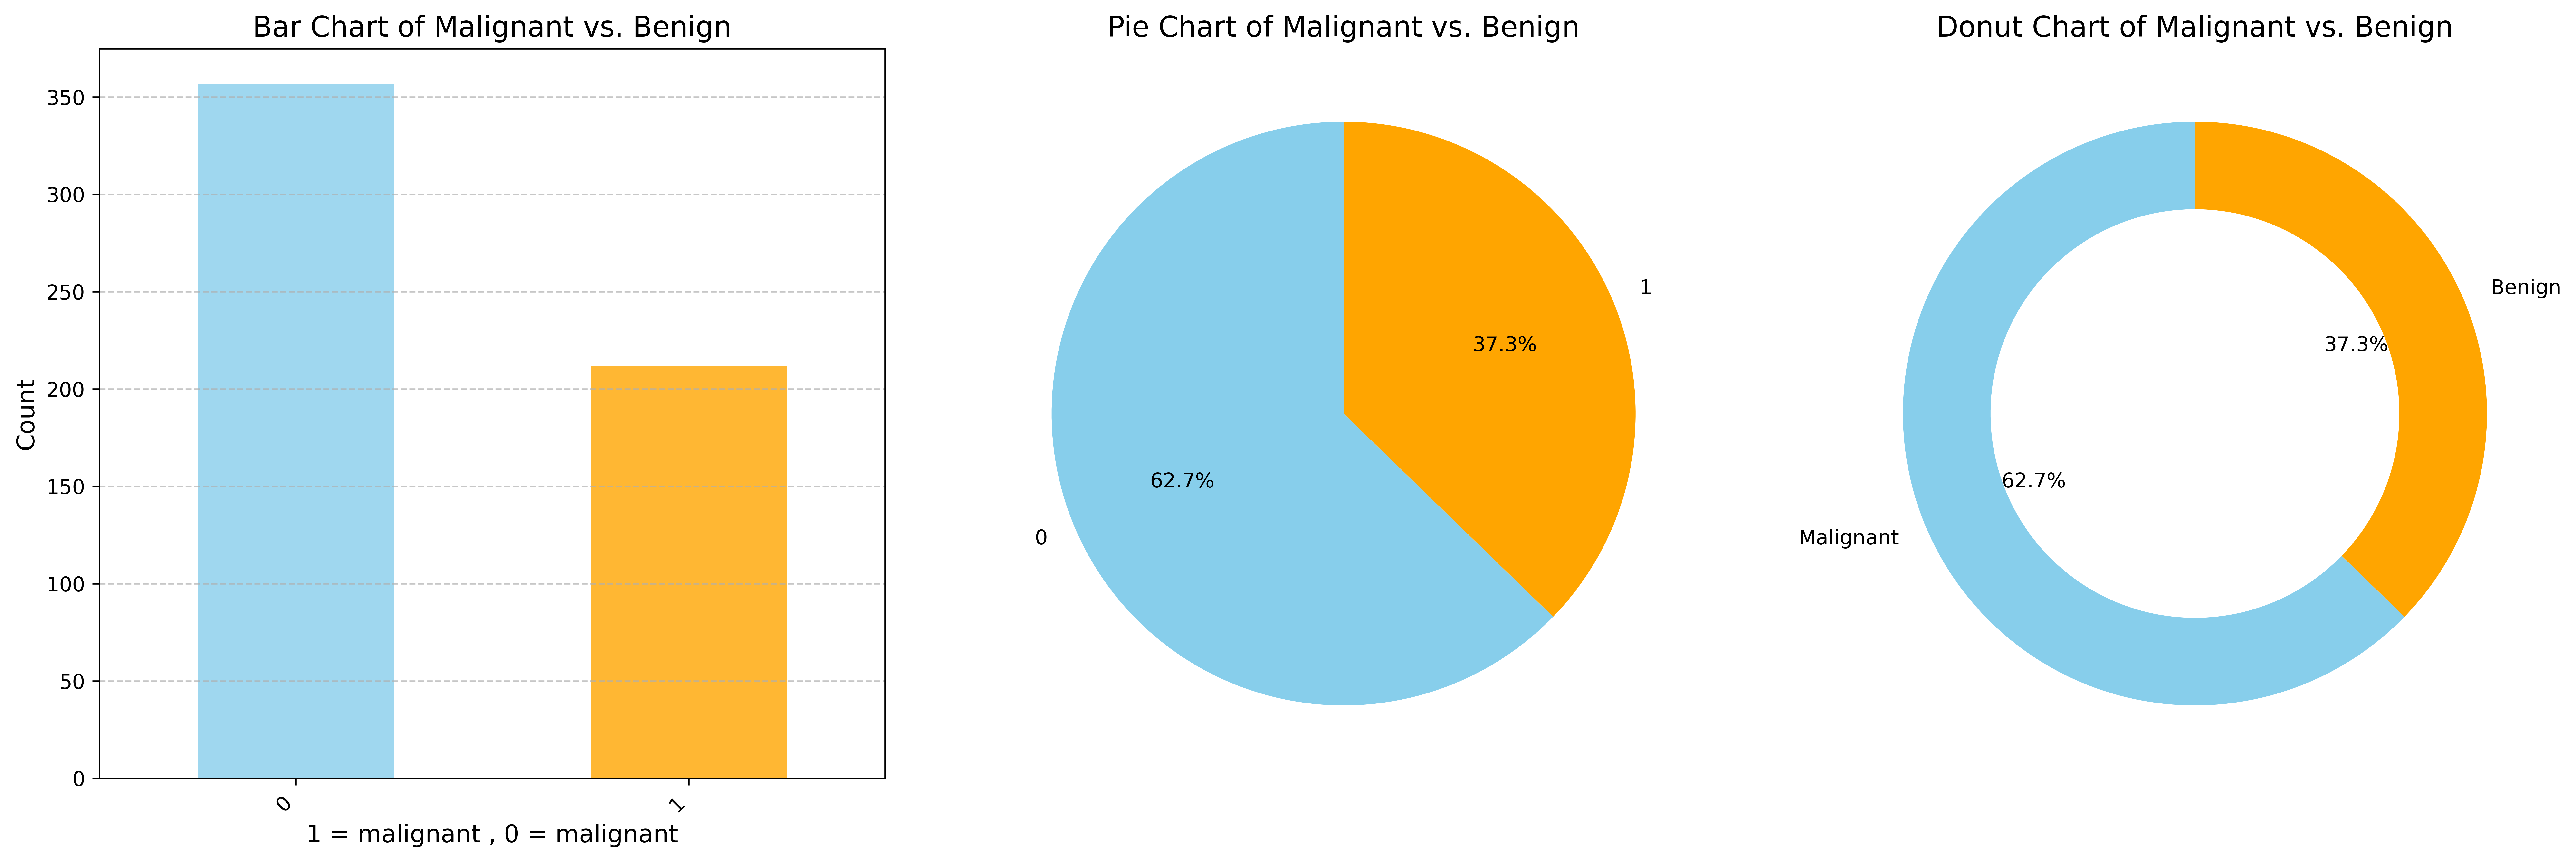

In [48]:
### set figure space with 3 subplots - one row, three columns
fig, axs = plt.subplots(1, 3, figsize=(18, 6), dpi=600)

### bar chart
df['Diagnosis'].value_counts().plot(kind='bar', color=['skyblue', 'orange'], alpha=0.8, ax=axs[0])
axs[0].set_title("Bar Chart of Malignant vs. Benign", fontsize=14)
axs[0].set_xlabel("1 = malignant , 0 = malignant", fontsize=12)
axs[0].set_ylabel("Count", fontsize=12)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha="right")

### pie chart
df['Diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'], startangle=90, ax=axs[1])
axs[1].set_title("Pie Chart of Malignant vs. Benign", fontsize=14)
axs[1].set_ylabel("")

### donut plot
counts = df['Diagnosis'].value_counts()
axs[2].pie(counts, labels=['Malignant', 'Benign'], autopct='%1.1f%%', colors=['skyblue', 'orange'], startangle=90, wedgeprops=dict(width=0.3))
axs[2].set_title("Donut Chart of Malignant vs. Benign", fontsize=14)

### adjust layout(set tight to fit space here)
plt.tight_layout()
plt.show()

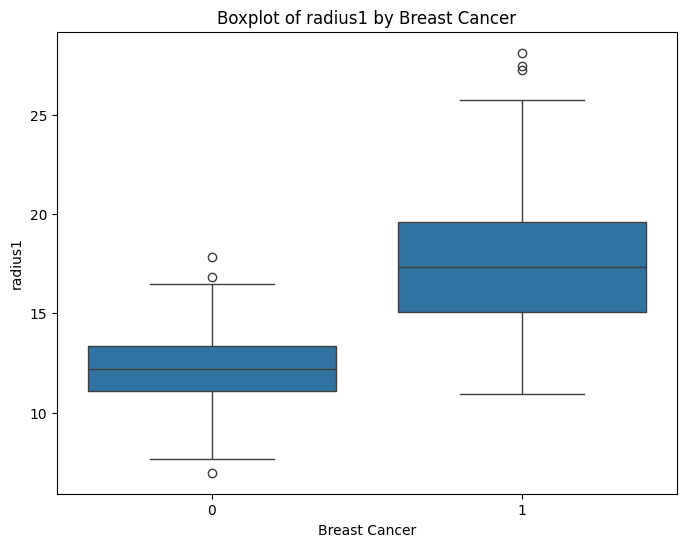

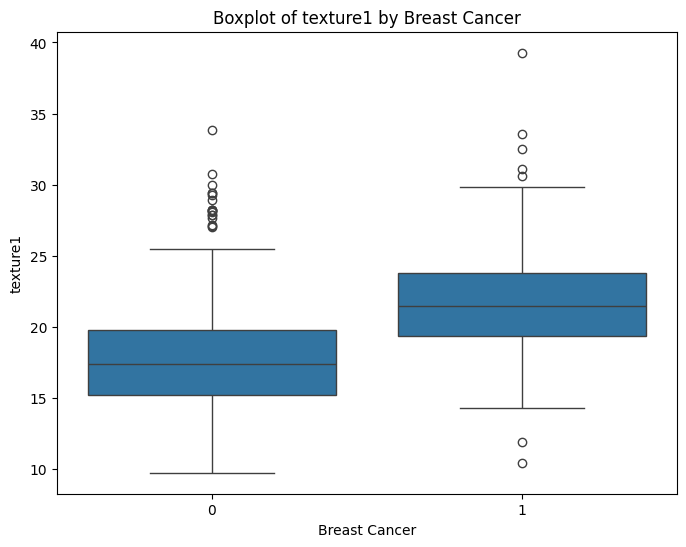

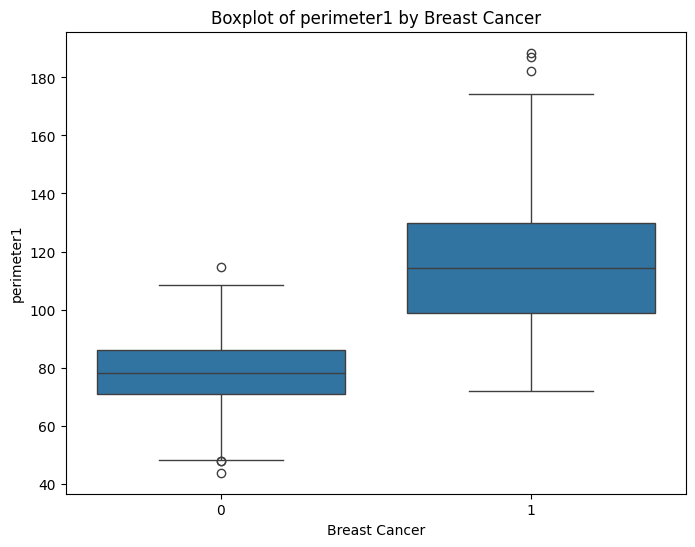

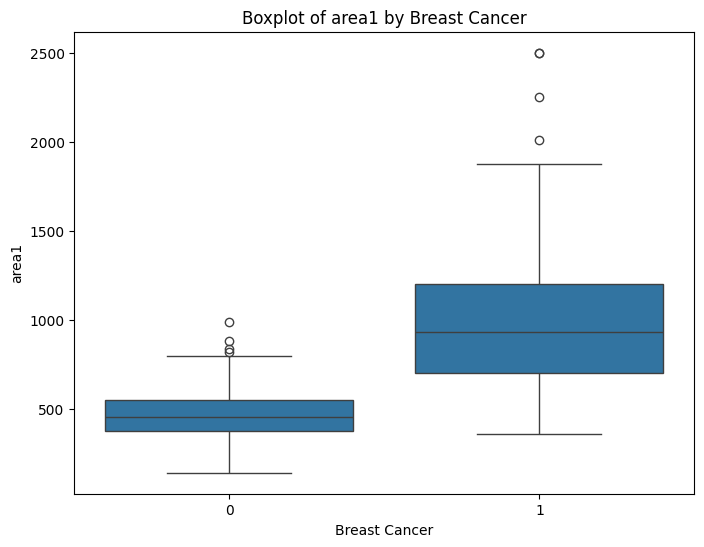

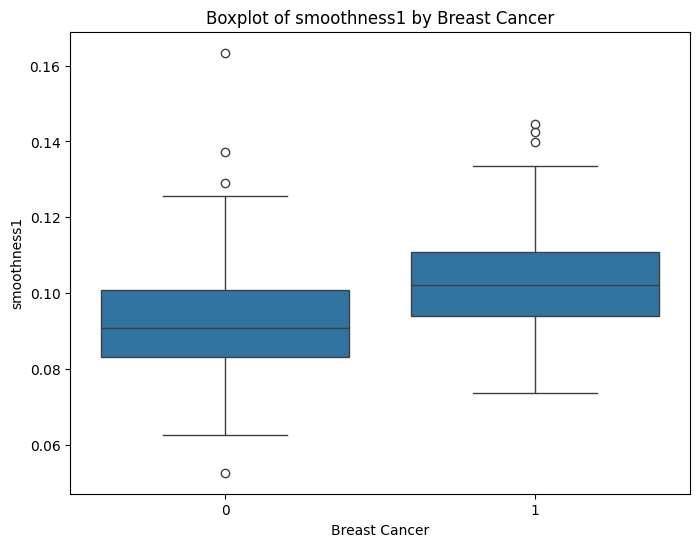

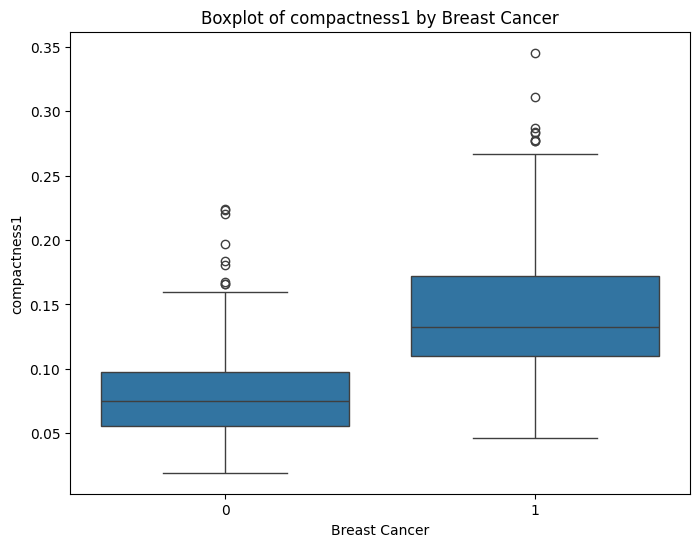

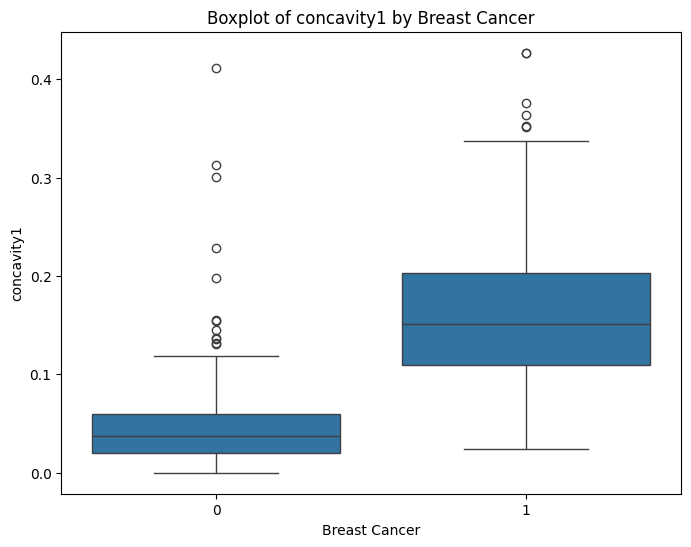

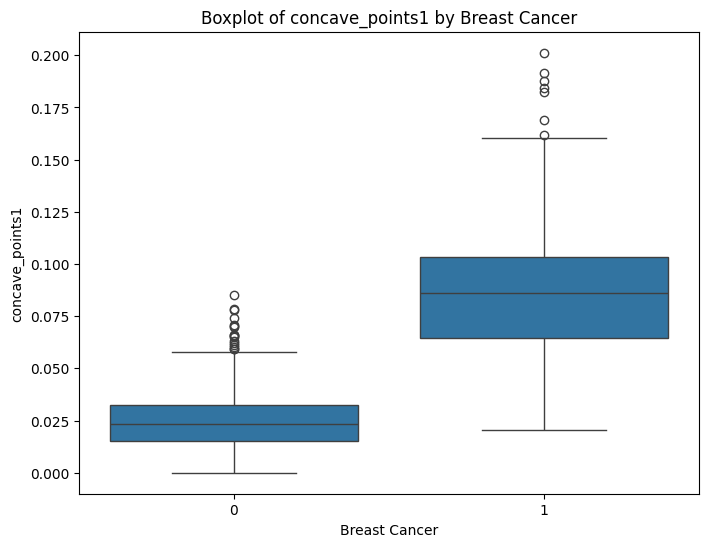

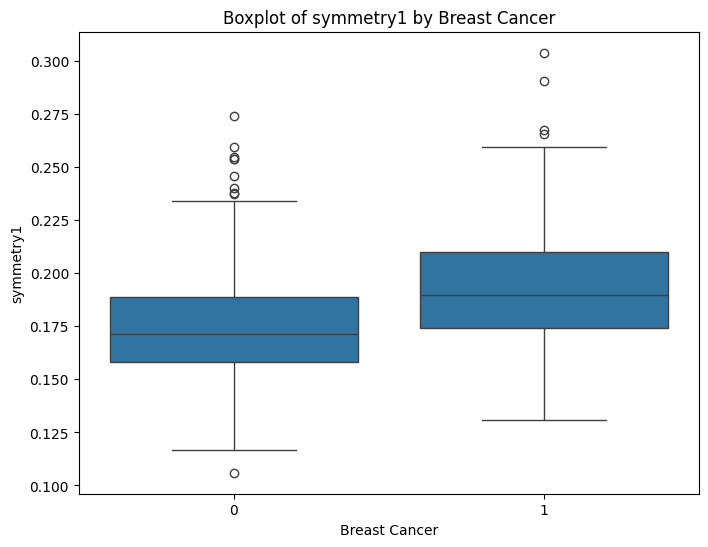

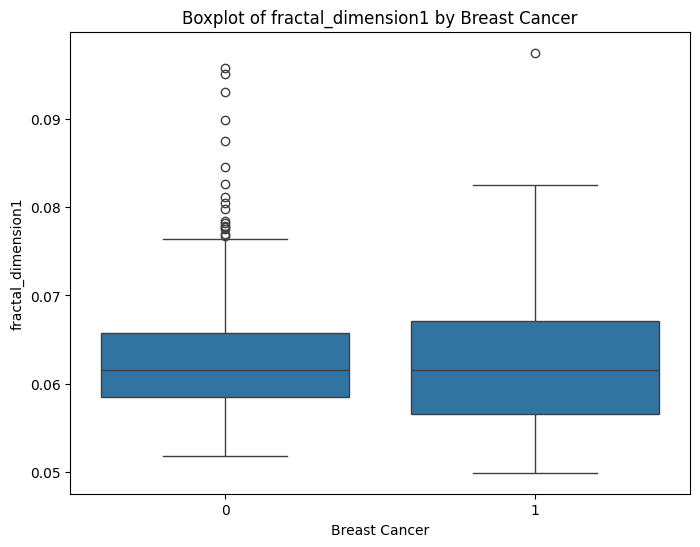

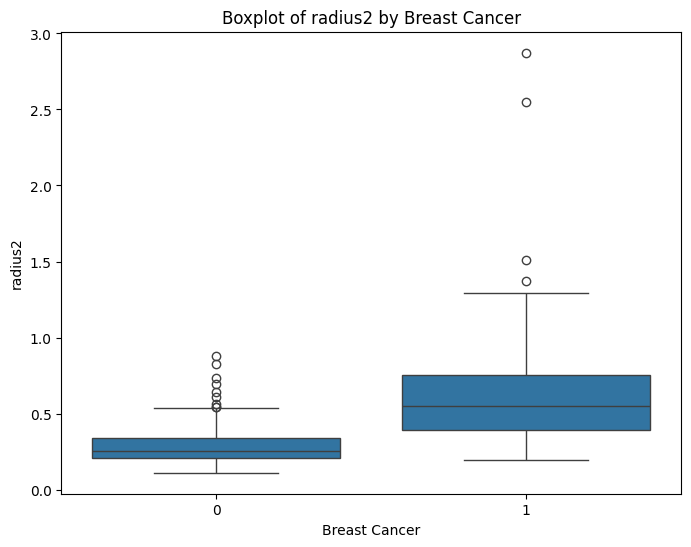

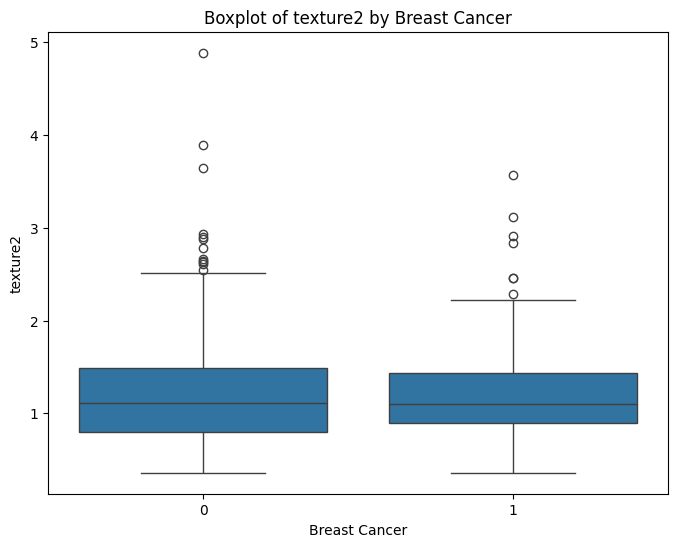

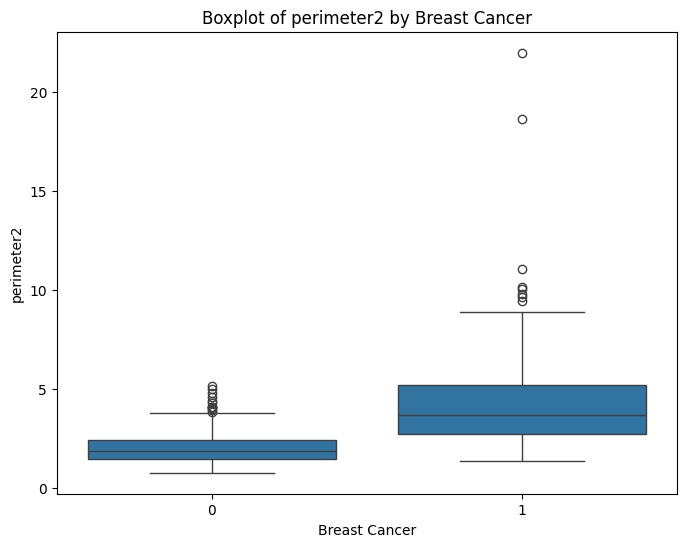

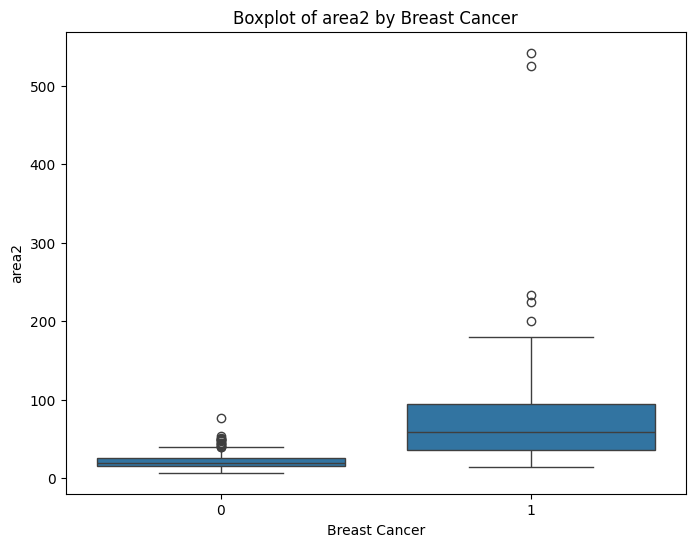

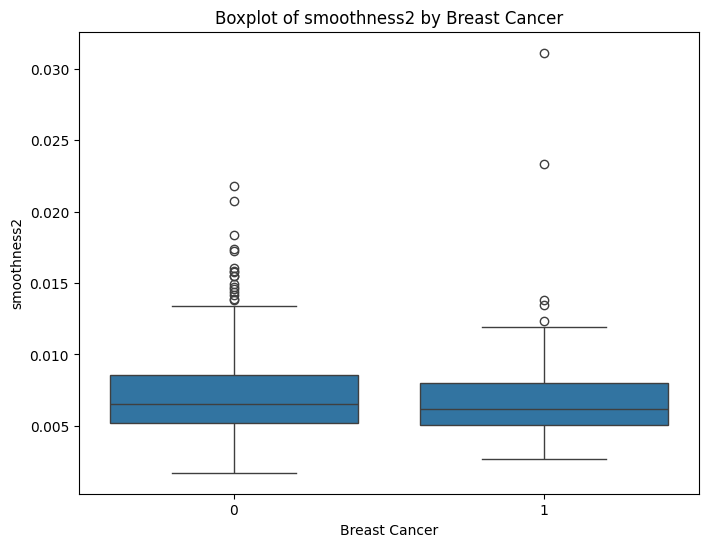

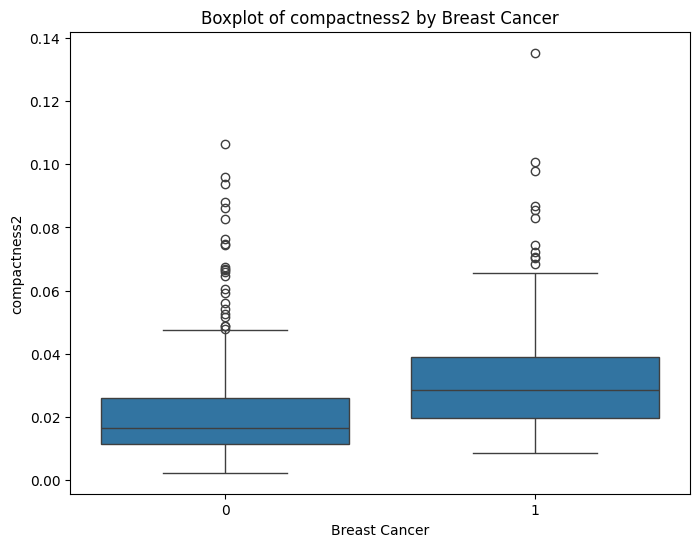

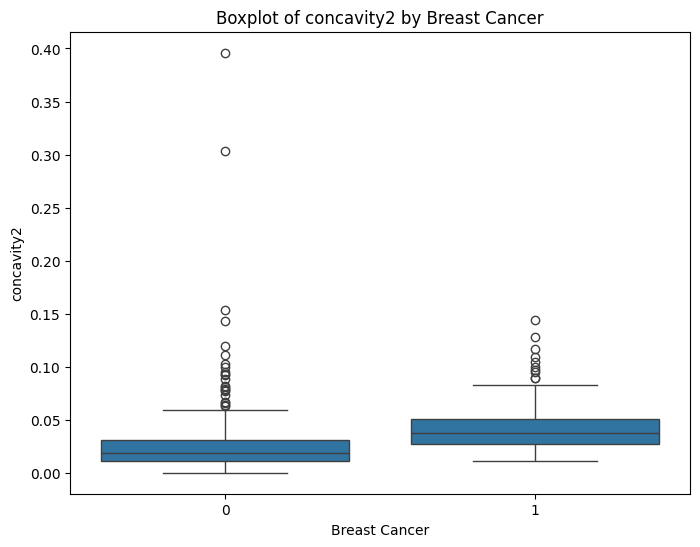

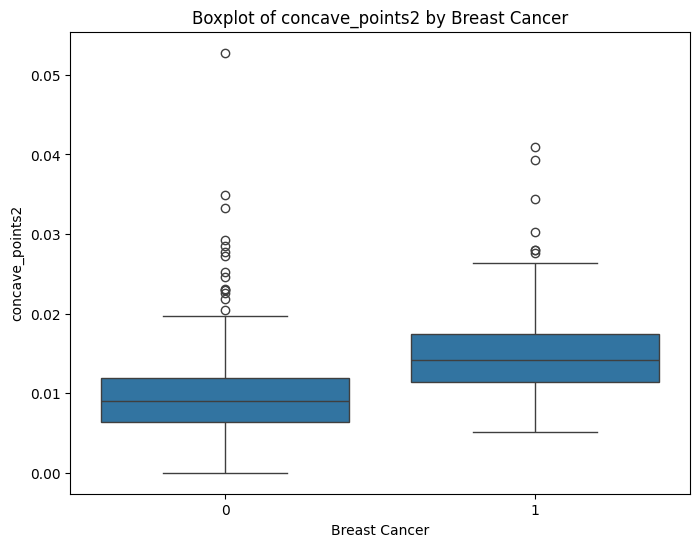

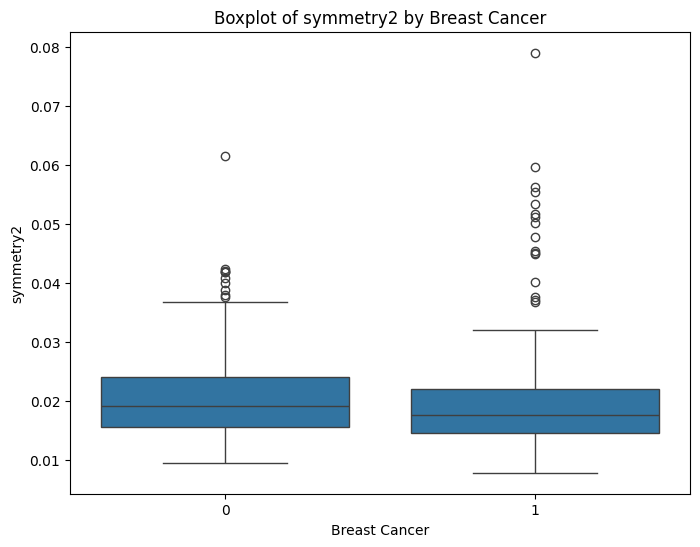

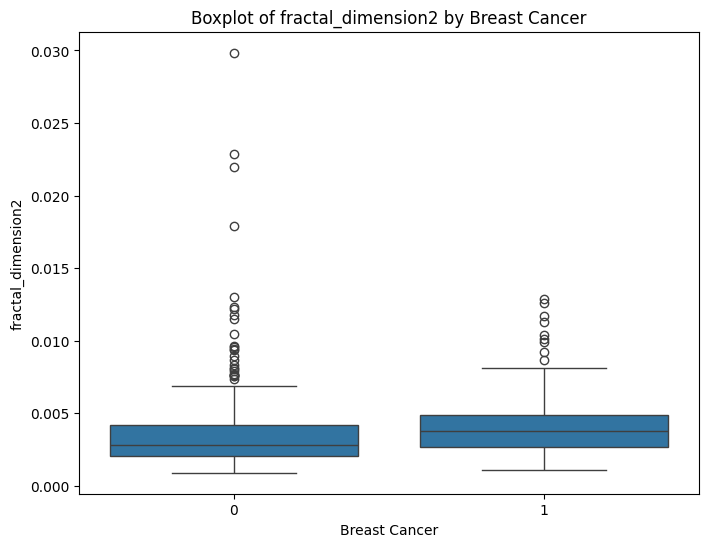

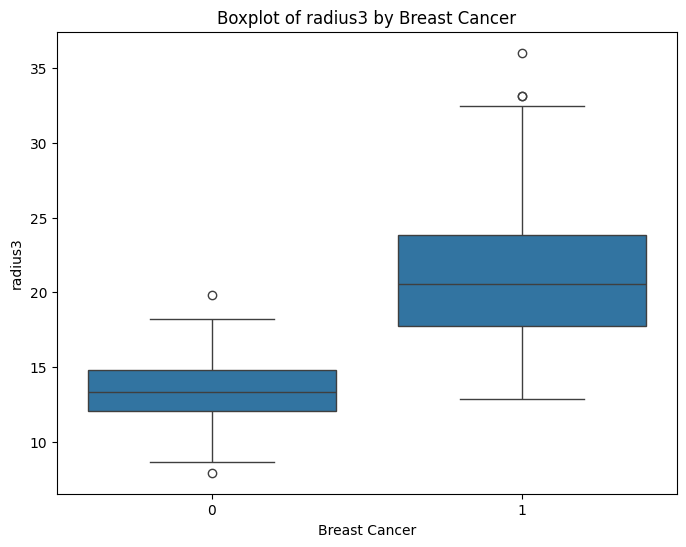

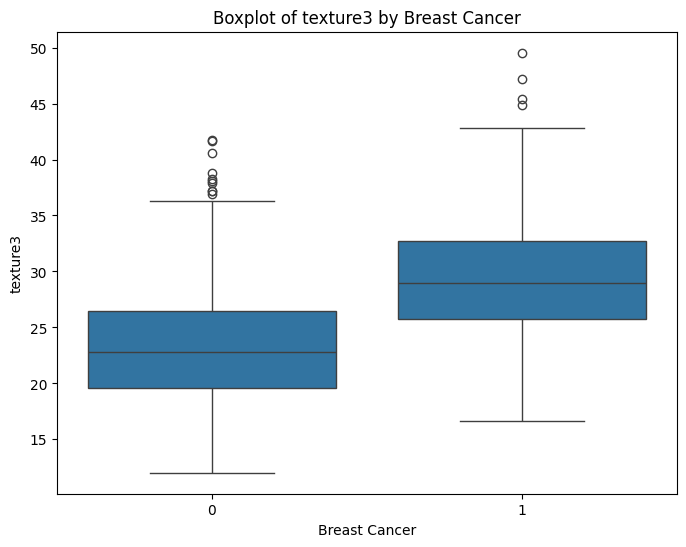

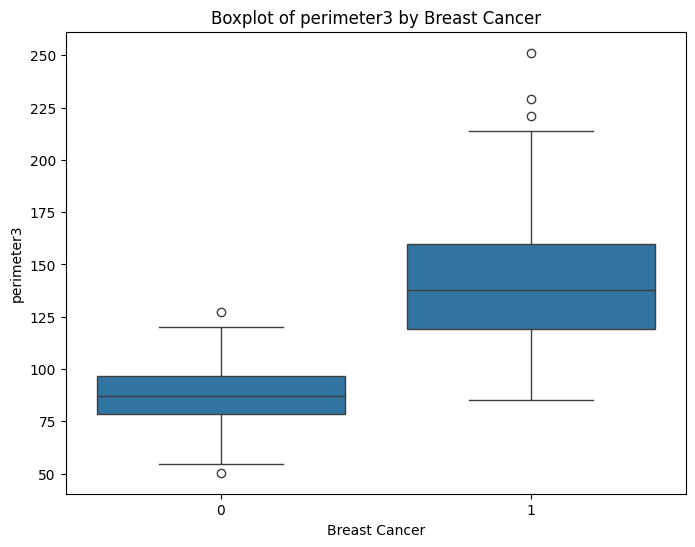

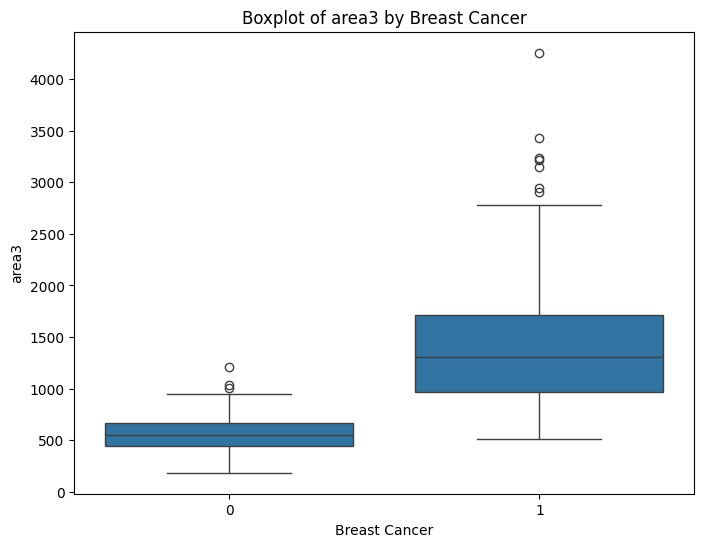

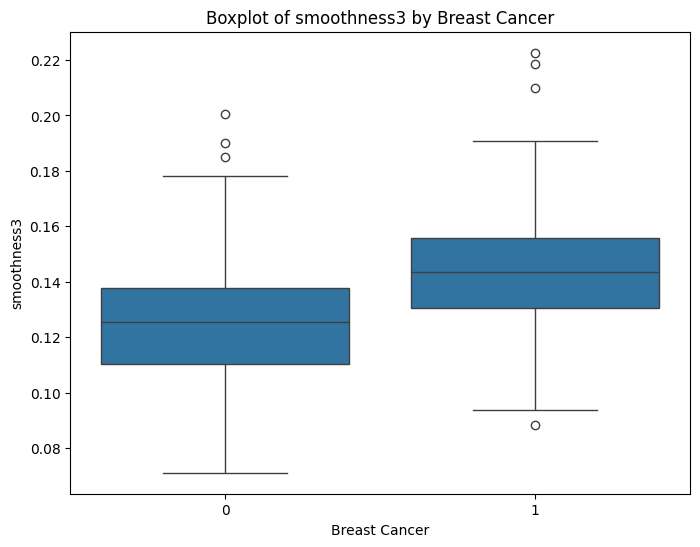

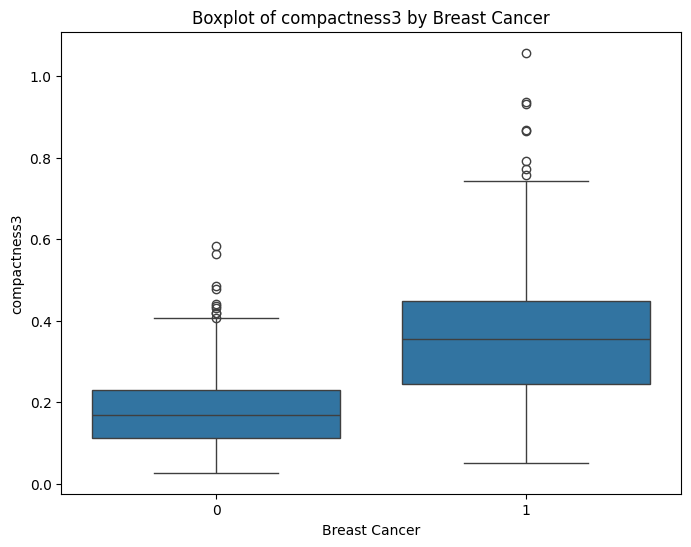

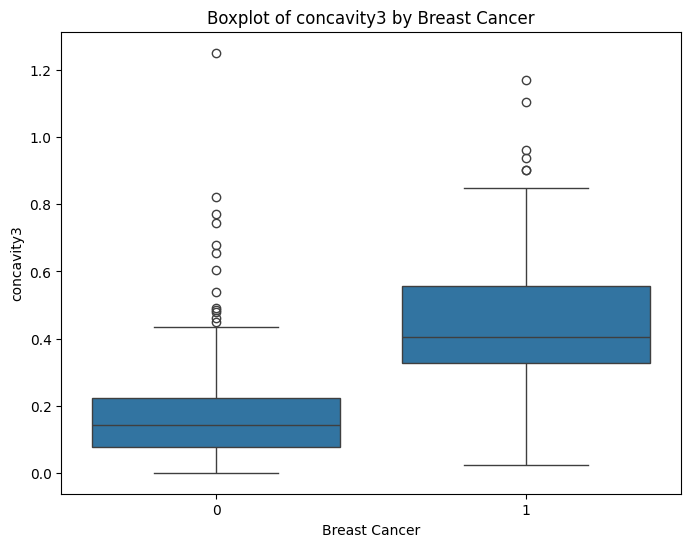

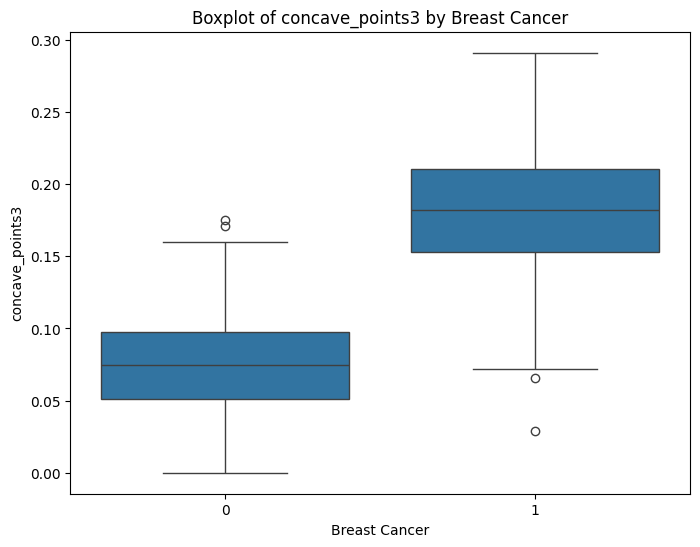

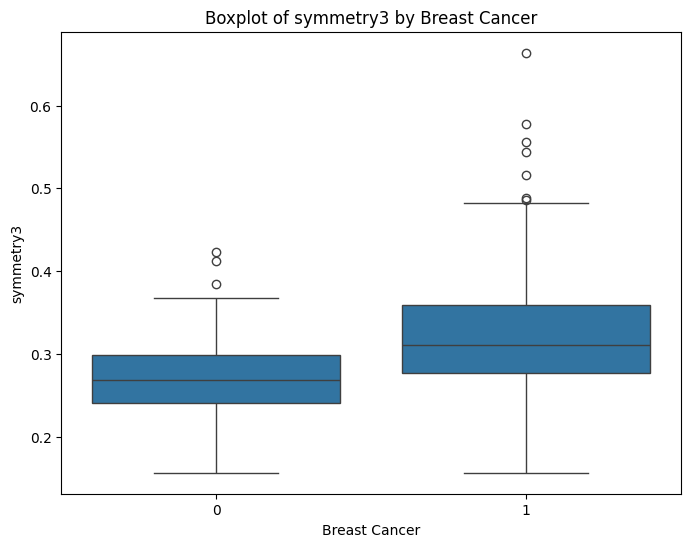

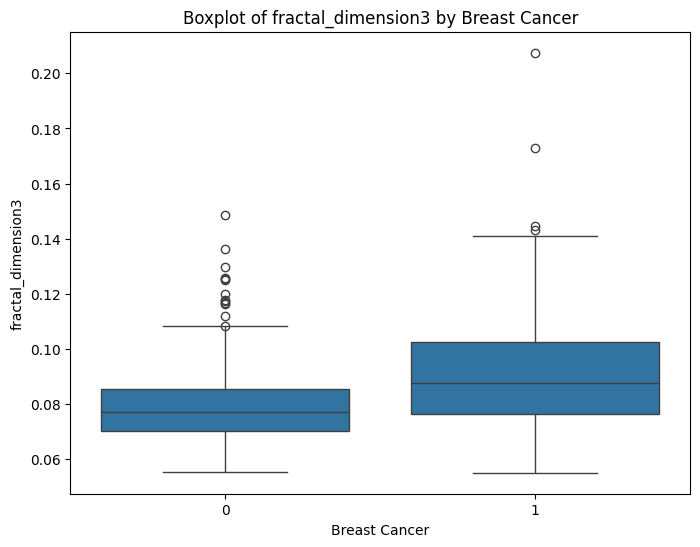

In [49]:
### loop for boxplots
for col in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Diagnosis', y=col, data=df)
    plt.title(f'Boxplot of {col} by Breast Cancer')
    plt.xlabel('Breast Cancer')
    plt.ylabel(col)
    plt.show()

## Data Preprocessing

In [50]:
X = df[features]
y = df['Diagnosis']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
### standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Predictive Modeling with Decision Tree

In [53]:
##### train model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [54]:
##### make predictions
y_pred = dtree.predict(X_test)
y_pred_prob = dtree.predict_proba(X_test)[:, 1]

In [55]:
##### evaluation: accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9473684210526315

In [56]:
#### evaluation - classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



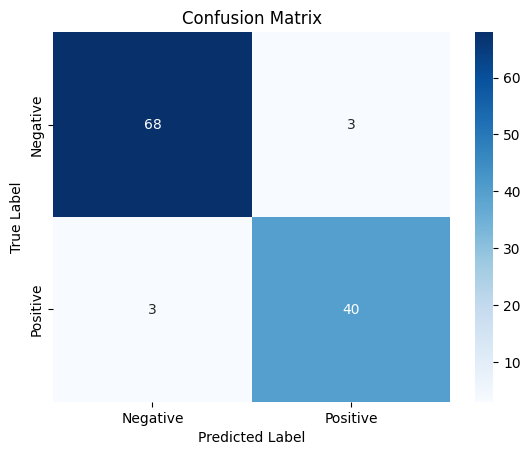

In [57]:
#### evaluation - confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

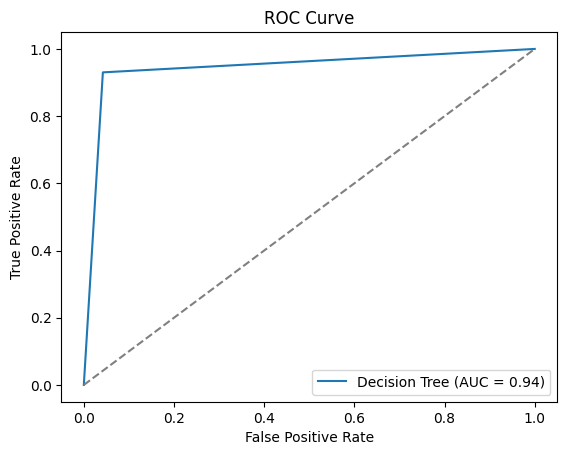

In [58]:
#### evaluation: ROC Curve and AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [59]:
#### hyperparamter optimization
param_grid = {
    'criterion': ['gini', 'entropy'],  ### splitting criteria
    'max_depth': [5, 10, 15, None],  ### maximum depth of tree
    'min_samples_split': [2, 5, 10],  ### minimum samples required to split internal node
    'min_samples_leaf': [1, 2, 5]  ### minimum samples required to be at leaf node
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

### best parameters
print(f"Best parameters: {grid_search.best_params_}")

### best nodel
best_dtree = grid_search.best_estimator_

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [60]:
##### finally, save model
import joblib
joblib.dump(best_dtree, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

## Predictive Modeling with ML Classifiers(Looping)


Training Logistic Regression

Logistic Regression Results:
Accuracy: 0.97
Confusion Matrix:
[[70  1]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



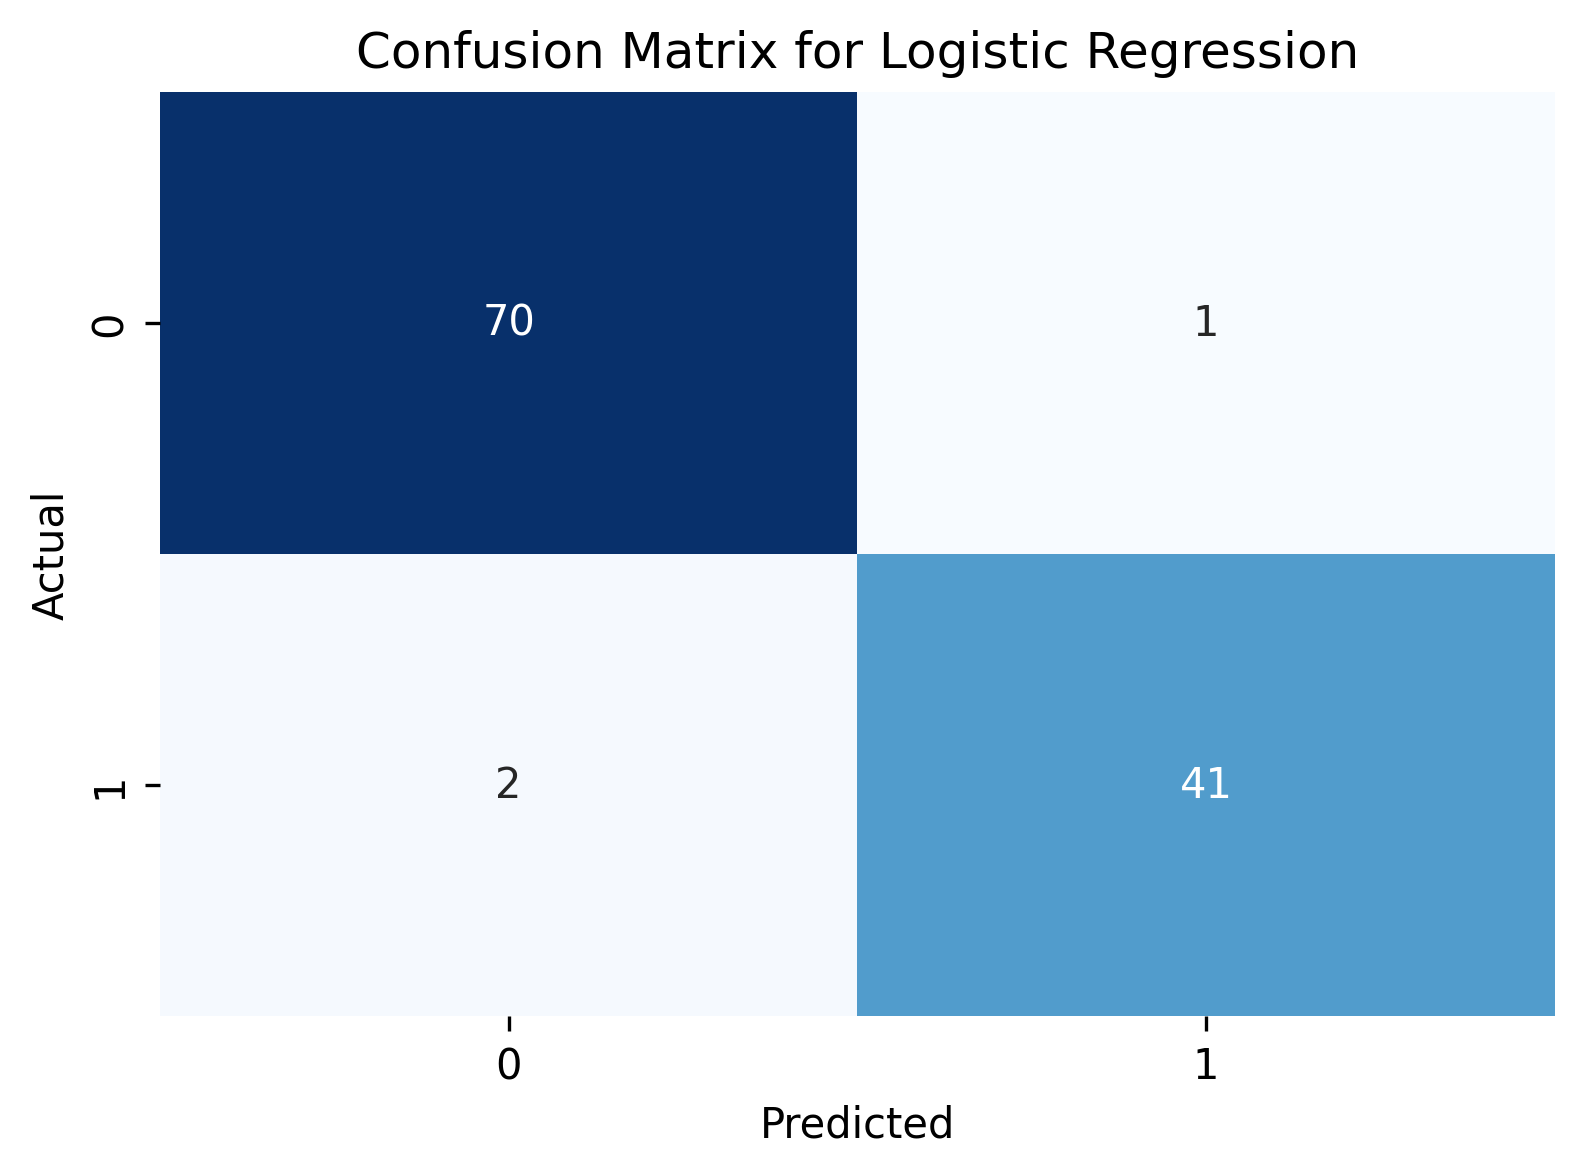


Training Random Forest

Random Forest Results:
Accuracy: 0.96
Confusion Matrix:
[[70  1]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



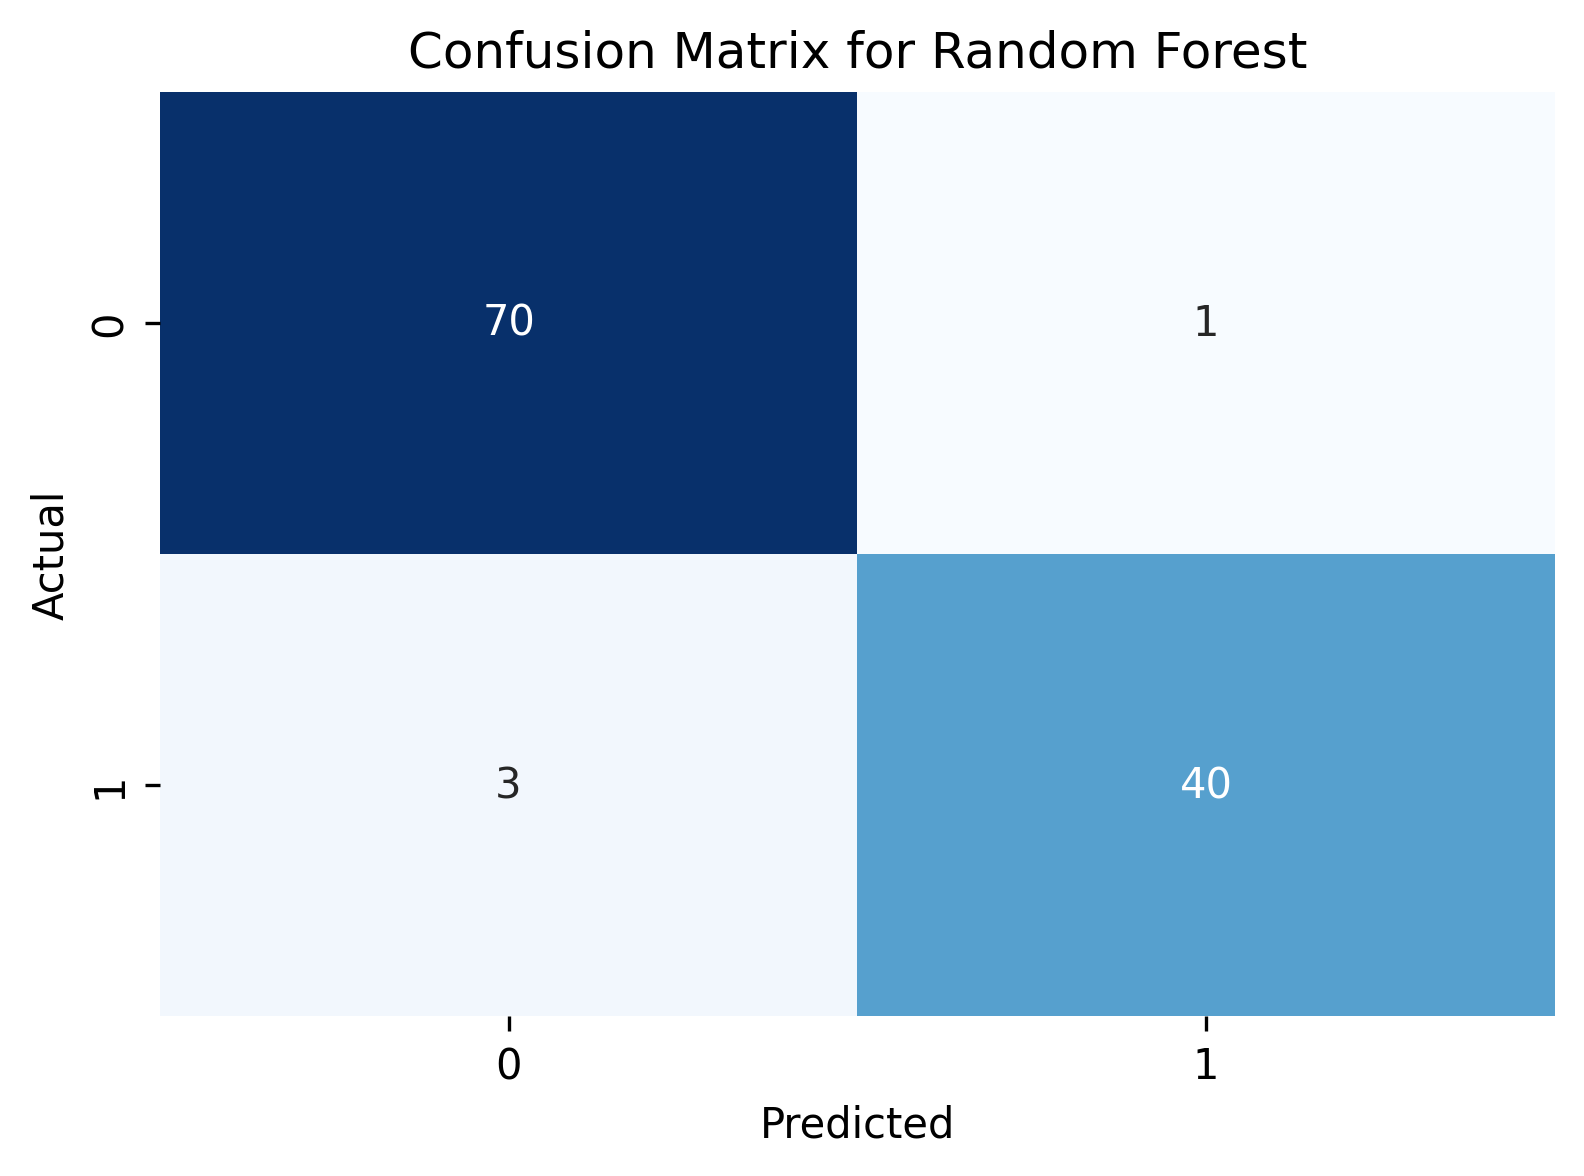


Training Gradient Boosting

Gradient Boosting Results:
Accuracy: 0.96
Confusion Matrix:
[[69  2]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



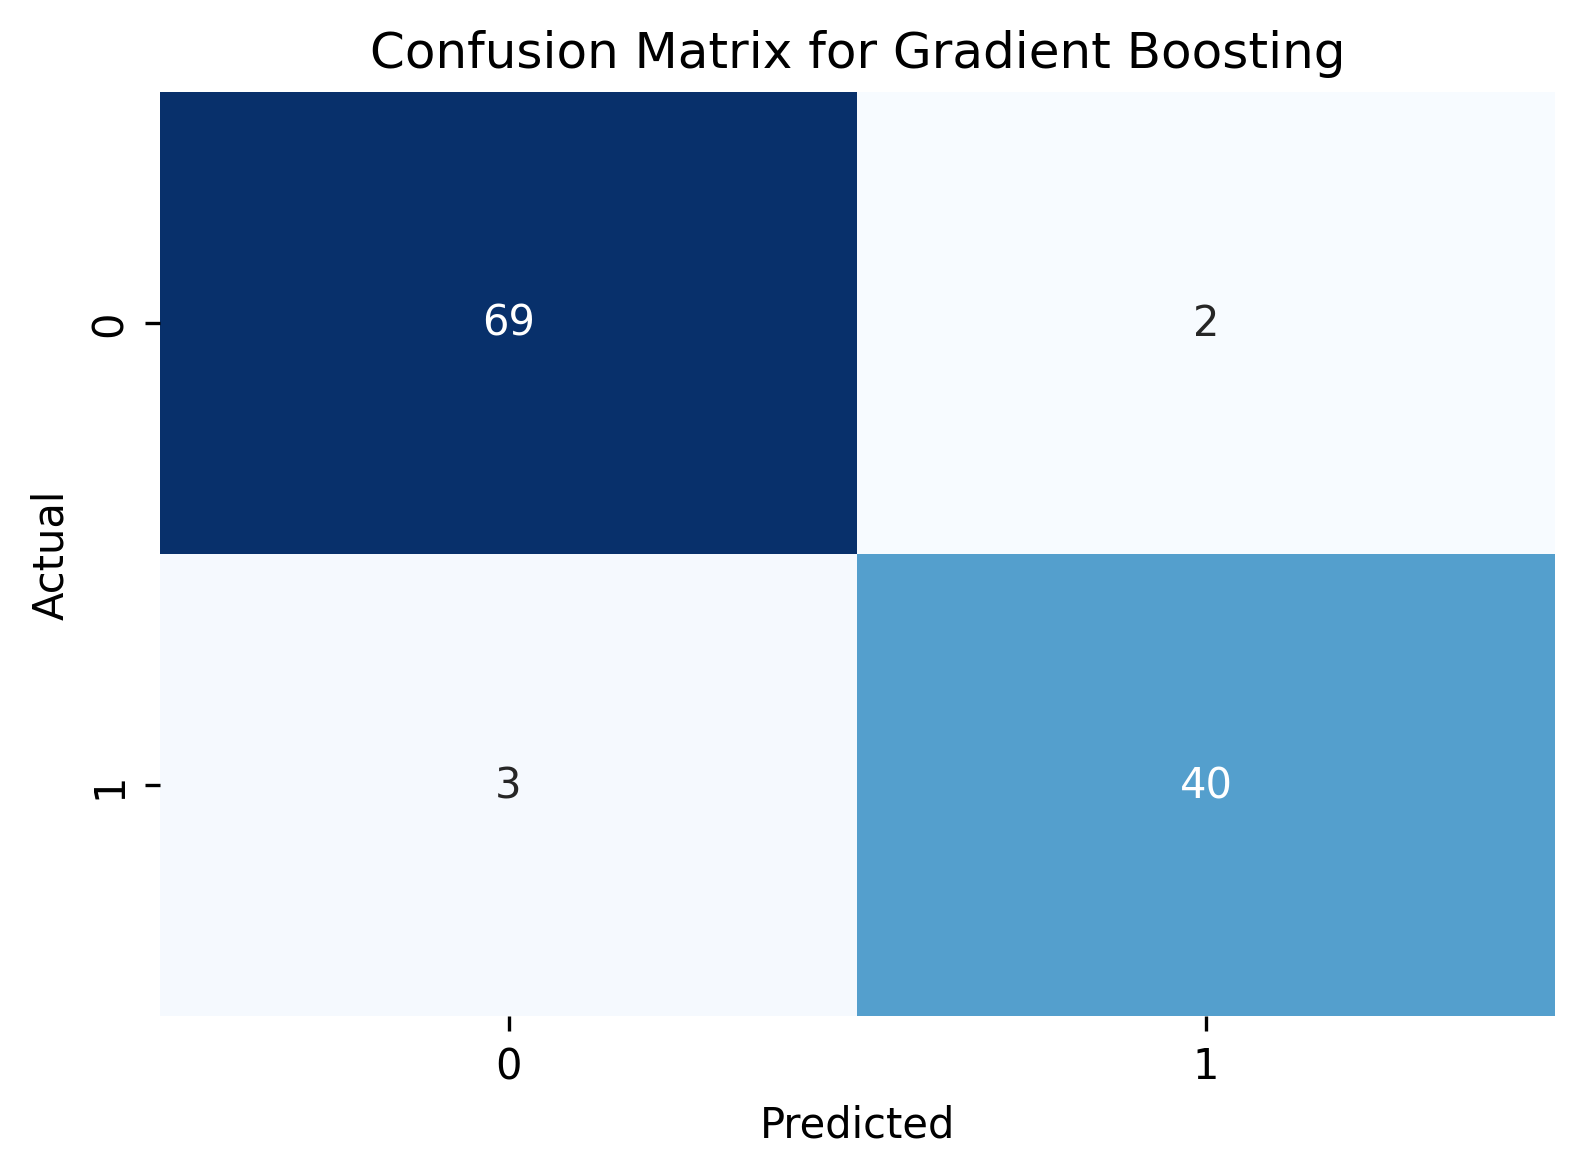


Training XGBoost

XGBoost Results:
Accuracy: 0.96
Confusion Matrix:
[[69  2]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



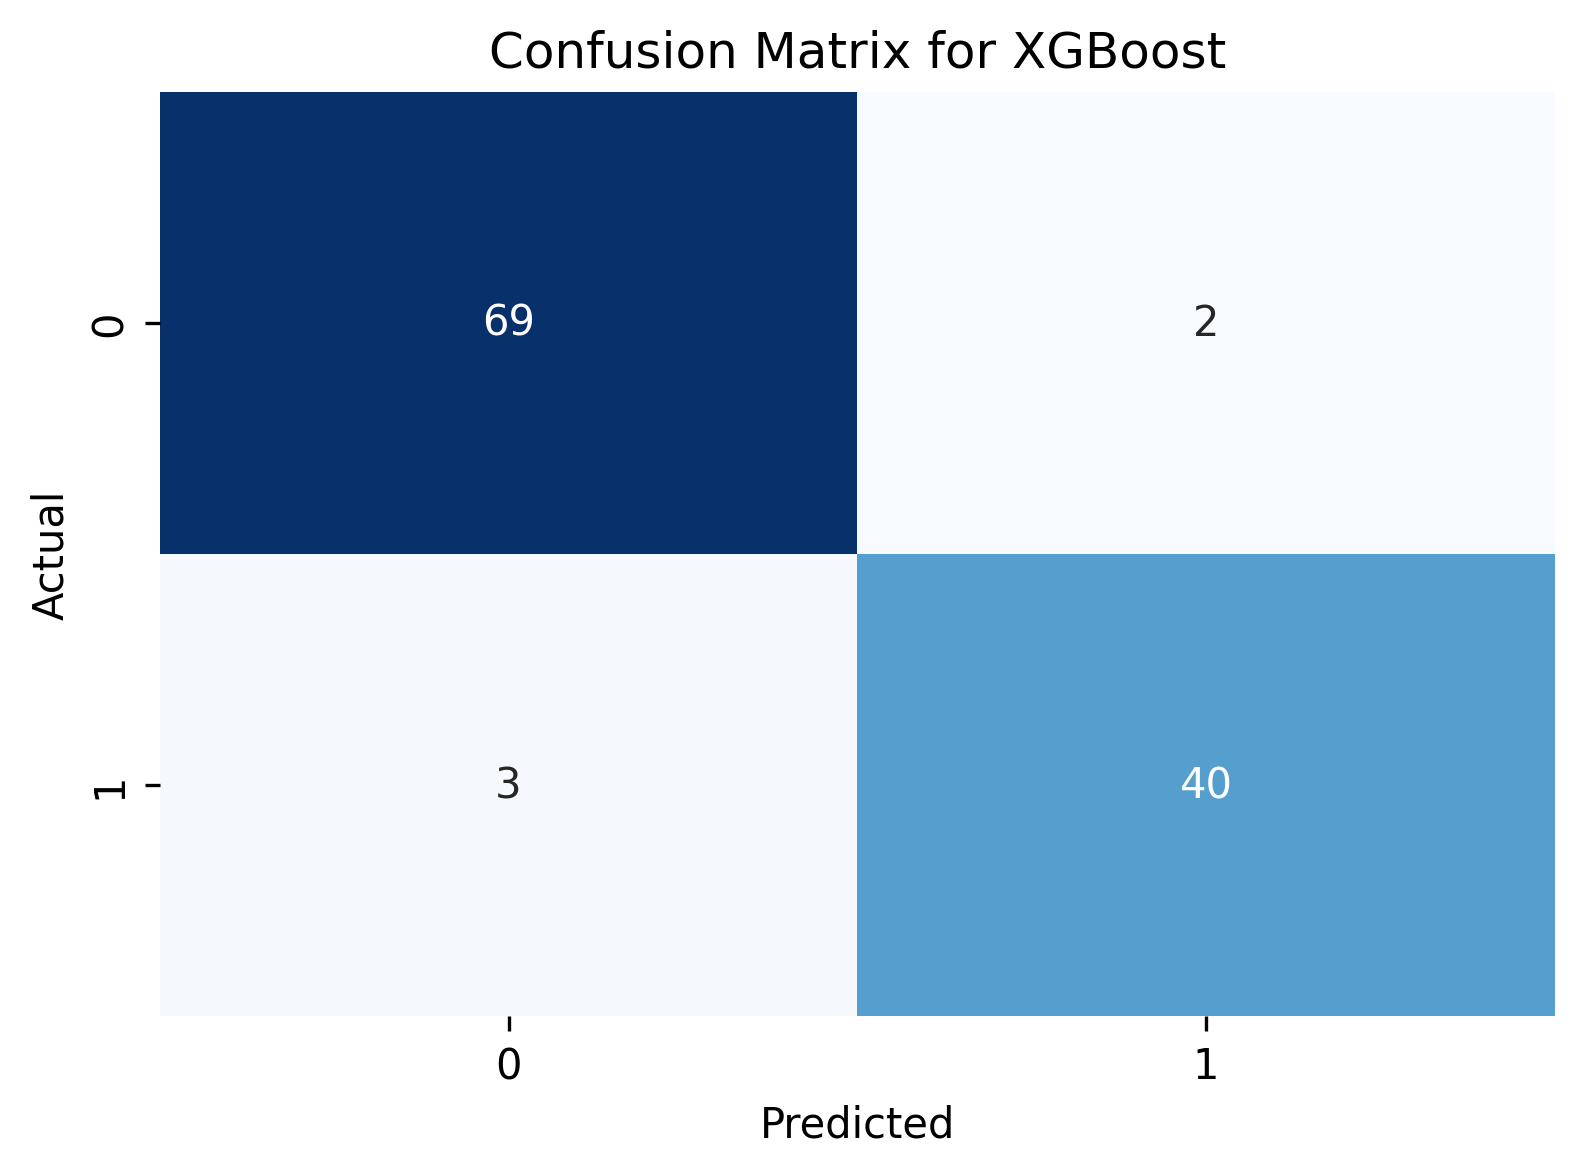


Training Support Vector Classifier

Support Vector Classifier Results:
Accuracy: 0.98
Confusion Matrix:
[[71  0]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



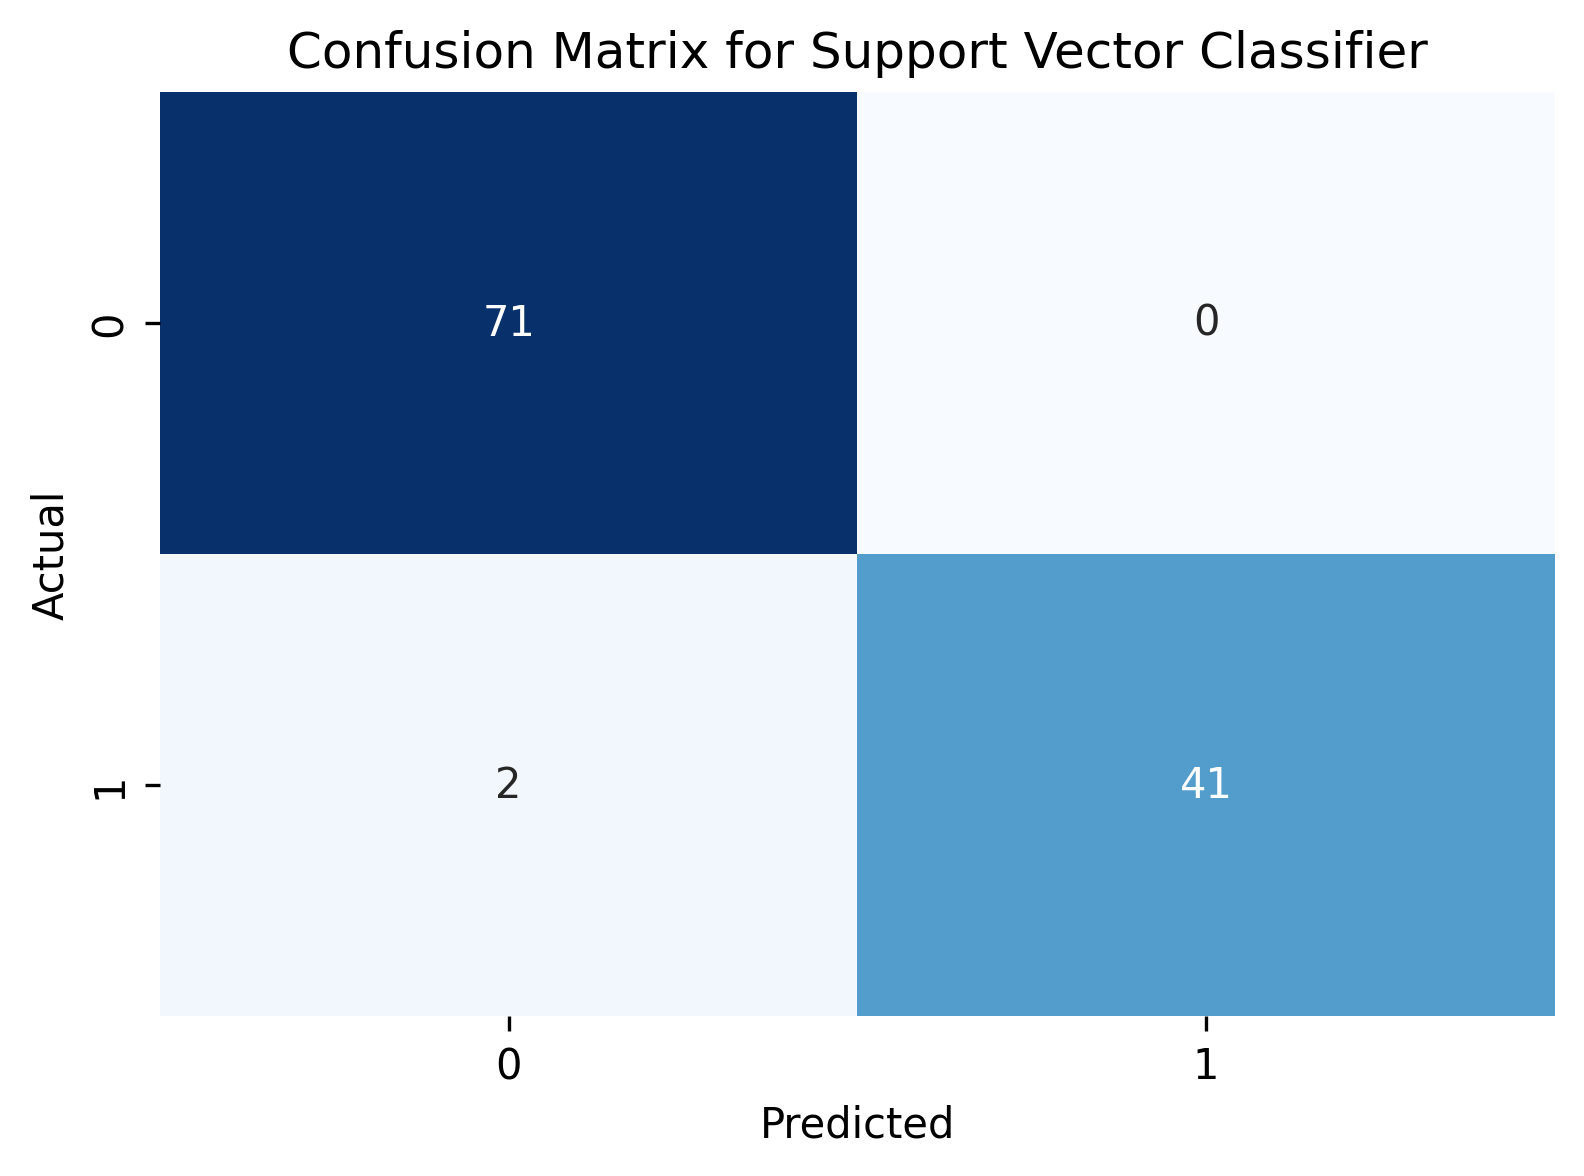


Training Linear SVM

Linear SVM Results:
Accuracy: 0.96
Confusion Matrix:
[[68  3]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



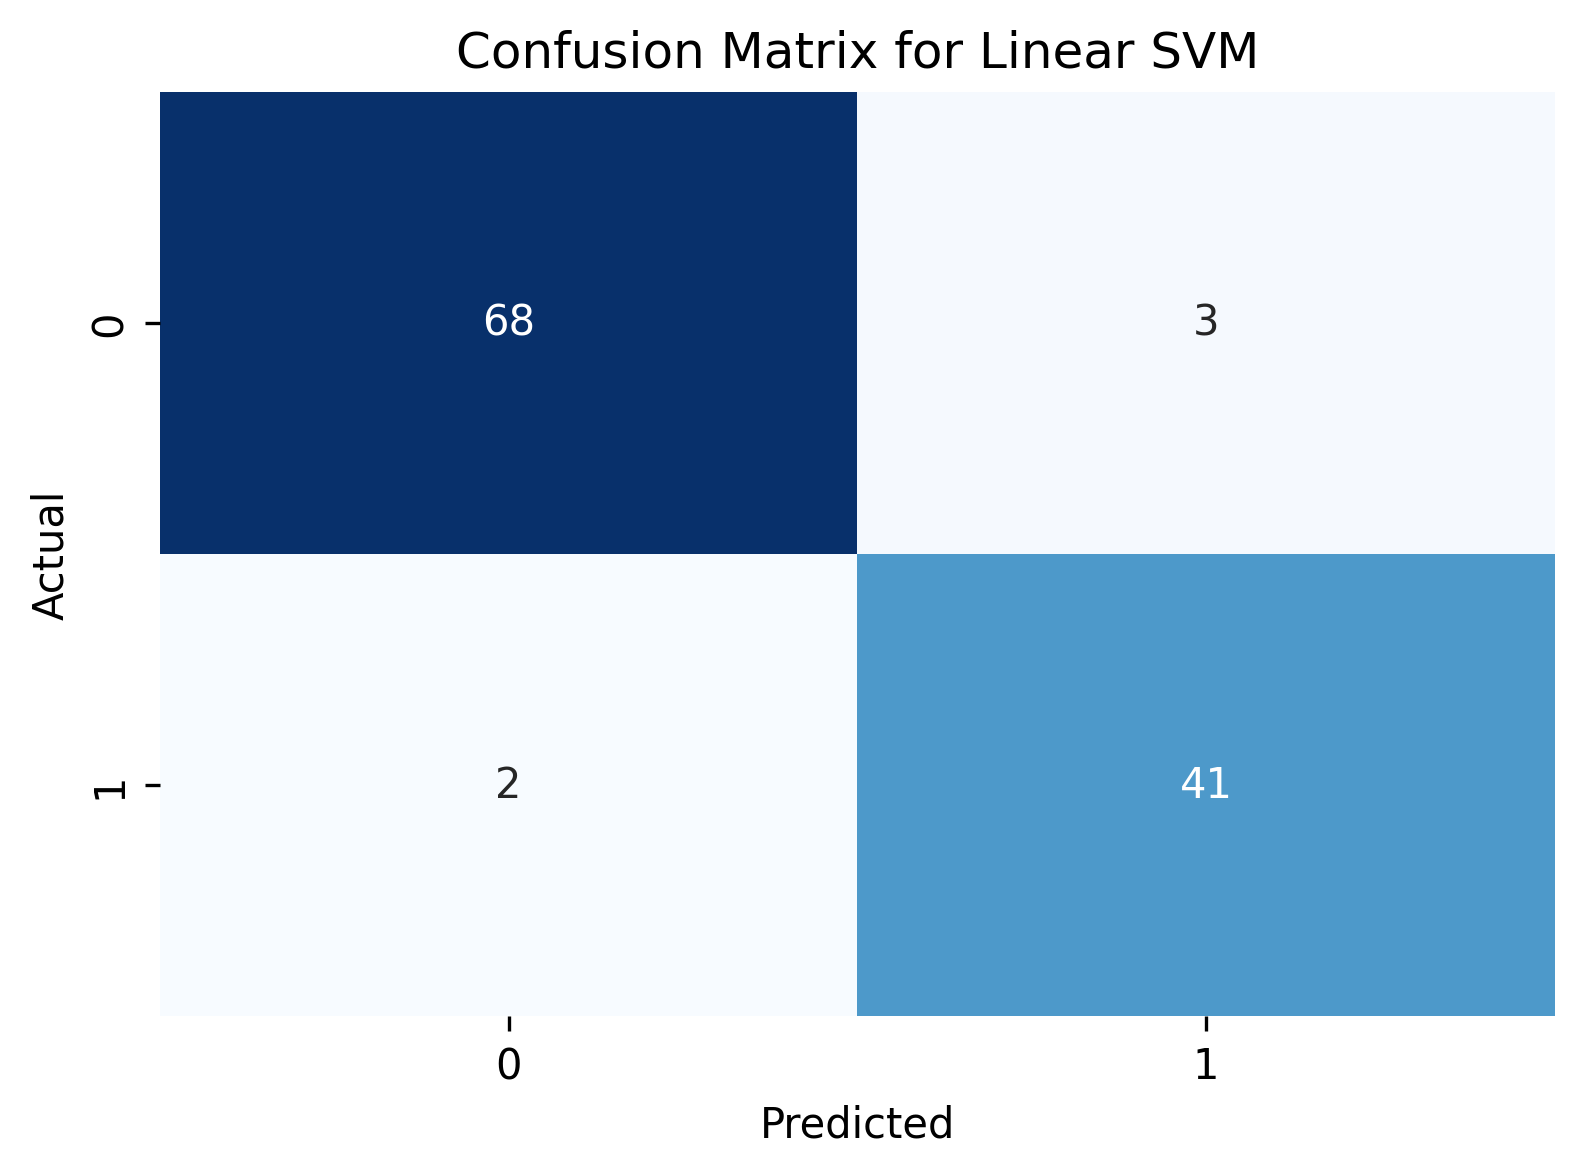


Training Decision Tree

Decision Tree Results:
Accuracy: 0.95
Confusion Matrix:
[[68  3]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



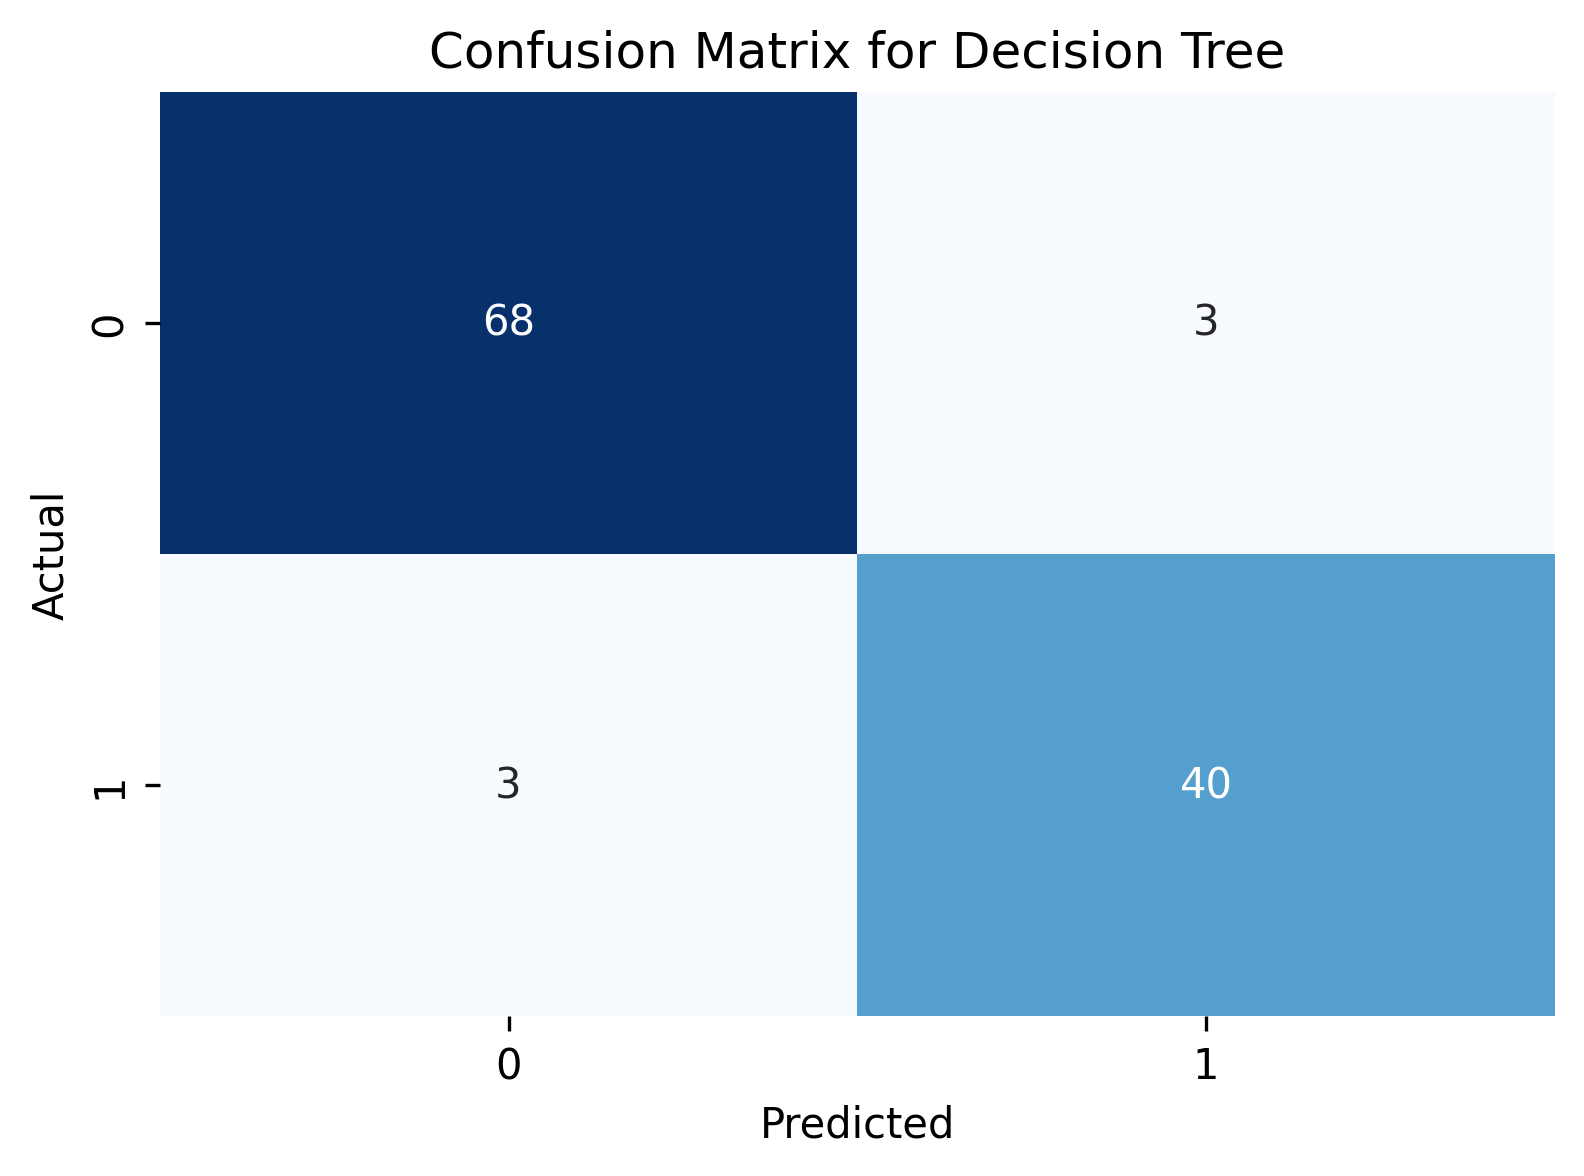


Training K-Nearest Neighbors

K-Nearest Neighbors Results:
Accuracy: 0.95
Confusion Matrix:
[[68  3]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



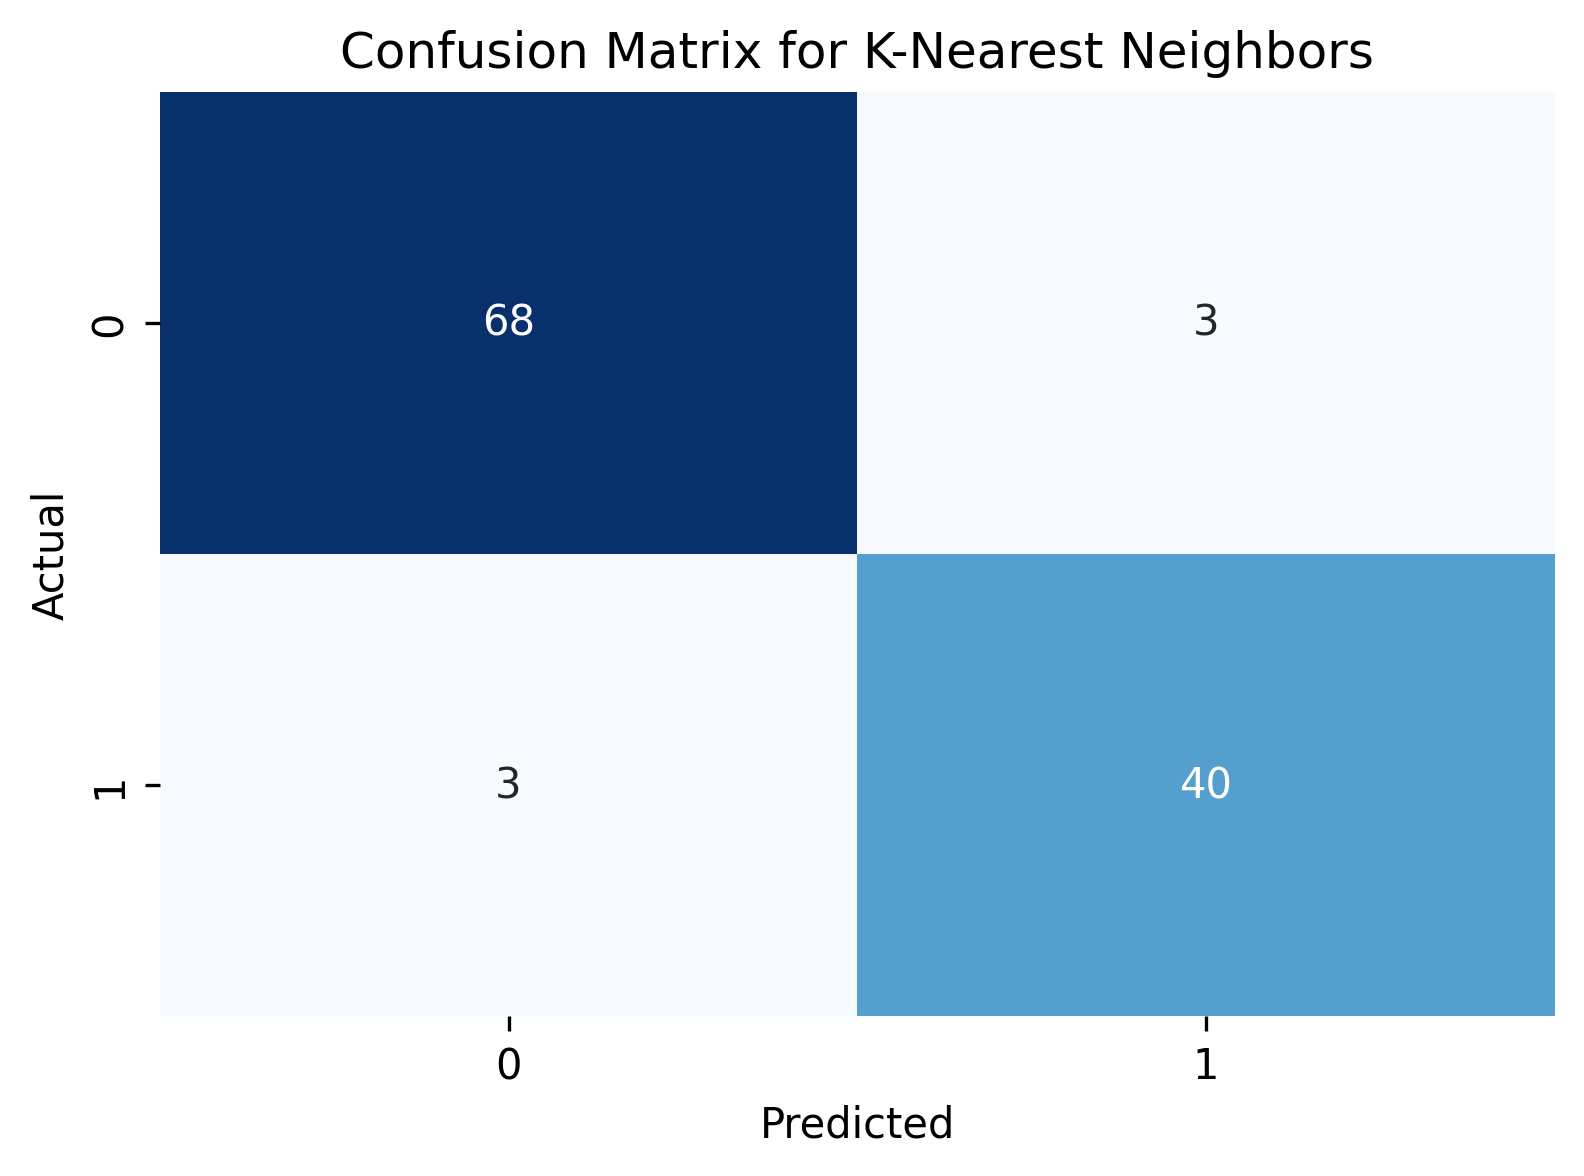


Training Naive Bayes

Naive Bayes Results:
Accuracy: 0.96
Confusion Matrix:
[[70  1]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



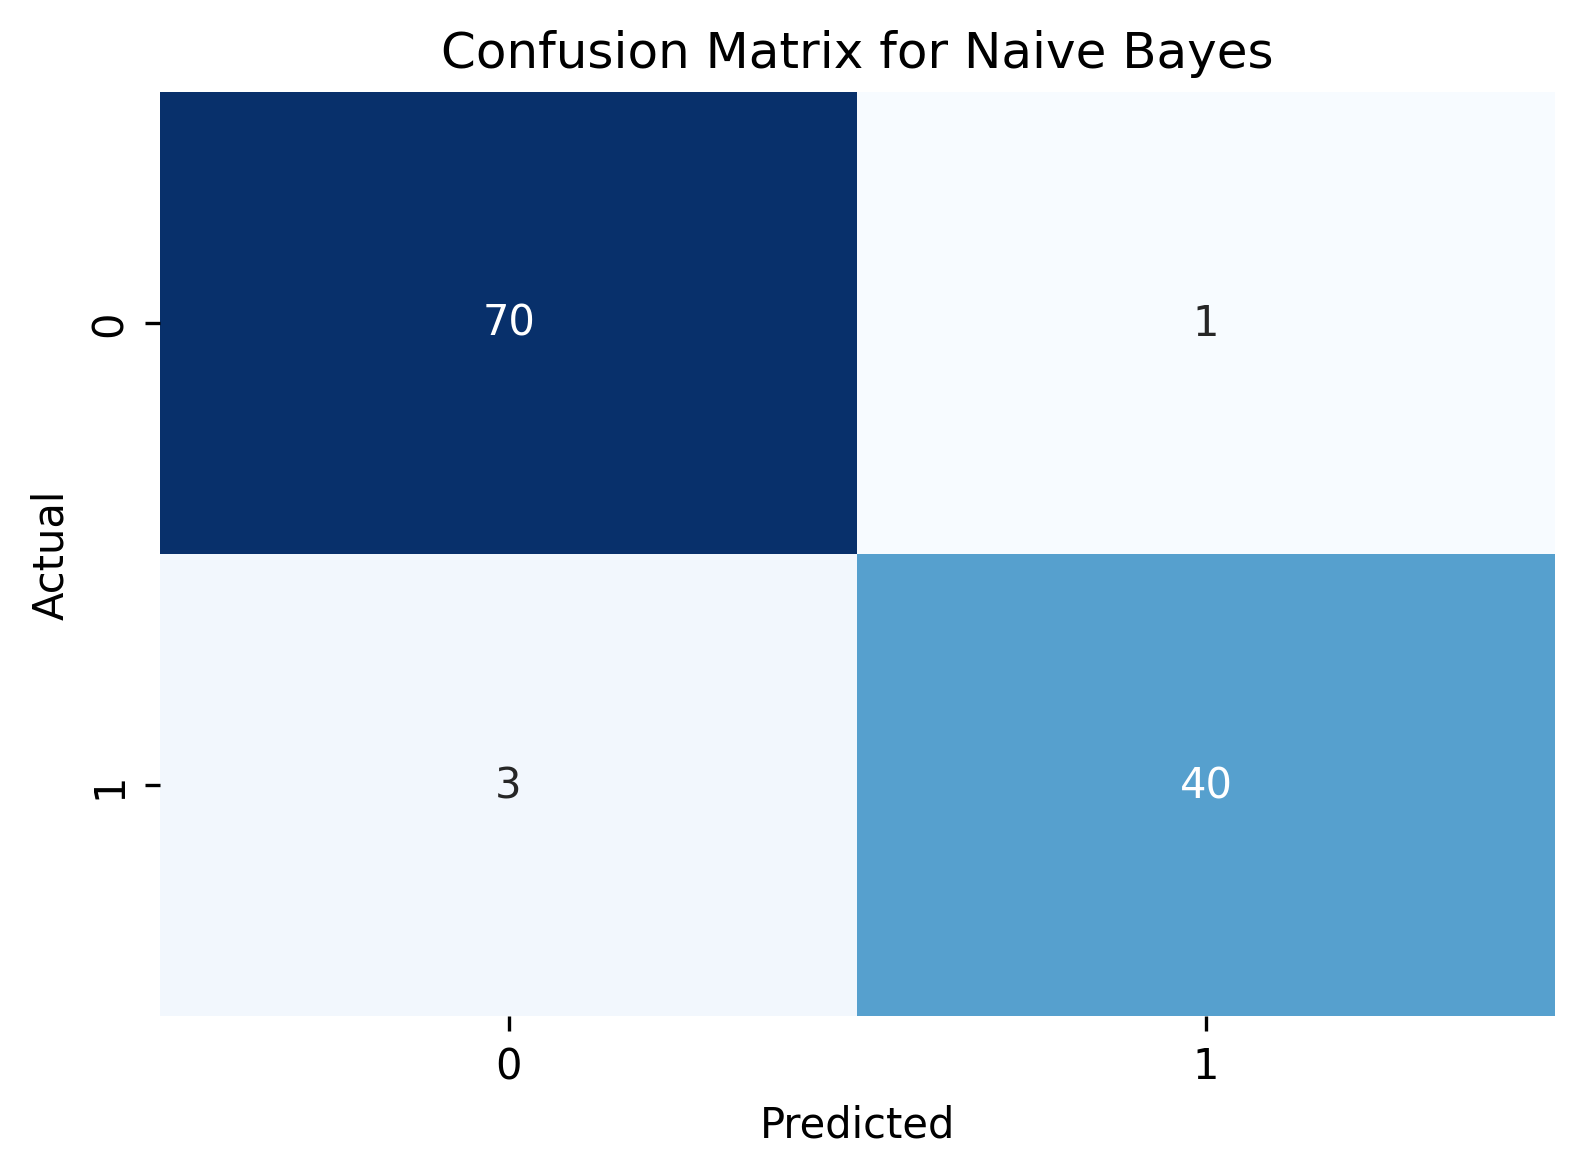


Training Neural Network (MLP)

Neural Network (MLP) Results:
Accuracy: 0.96
Confusion Matrix:
[[69  2]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



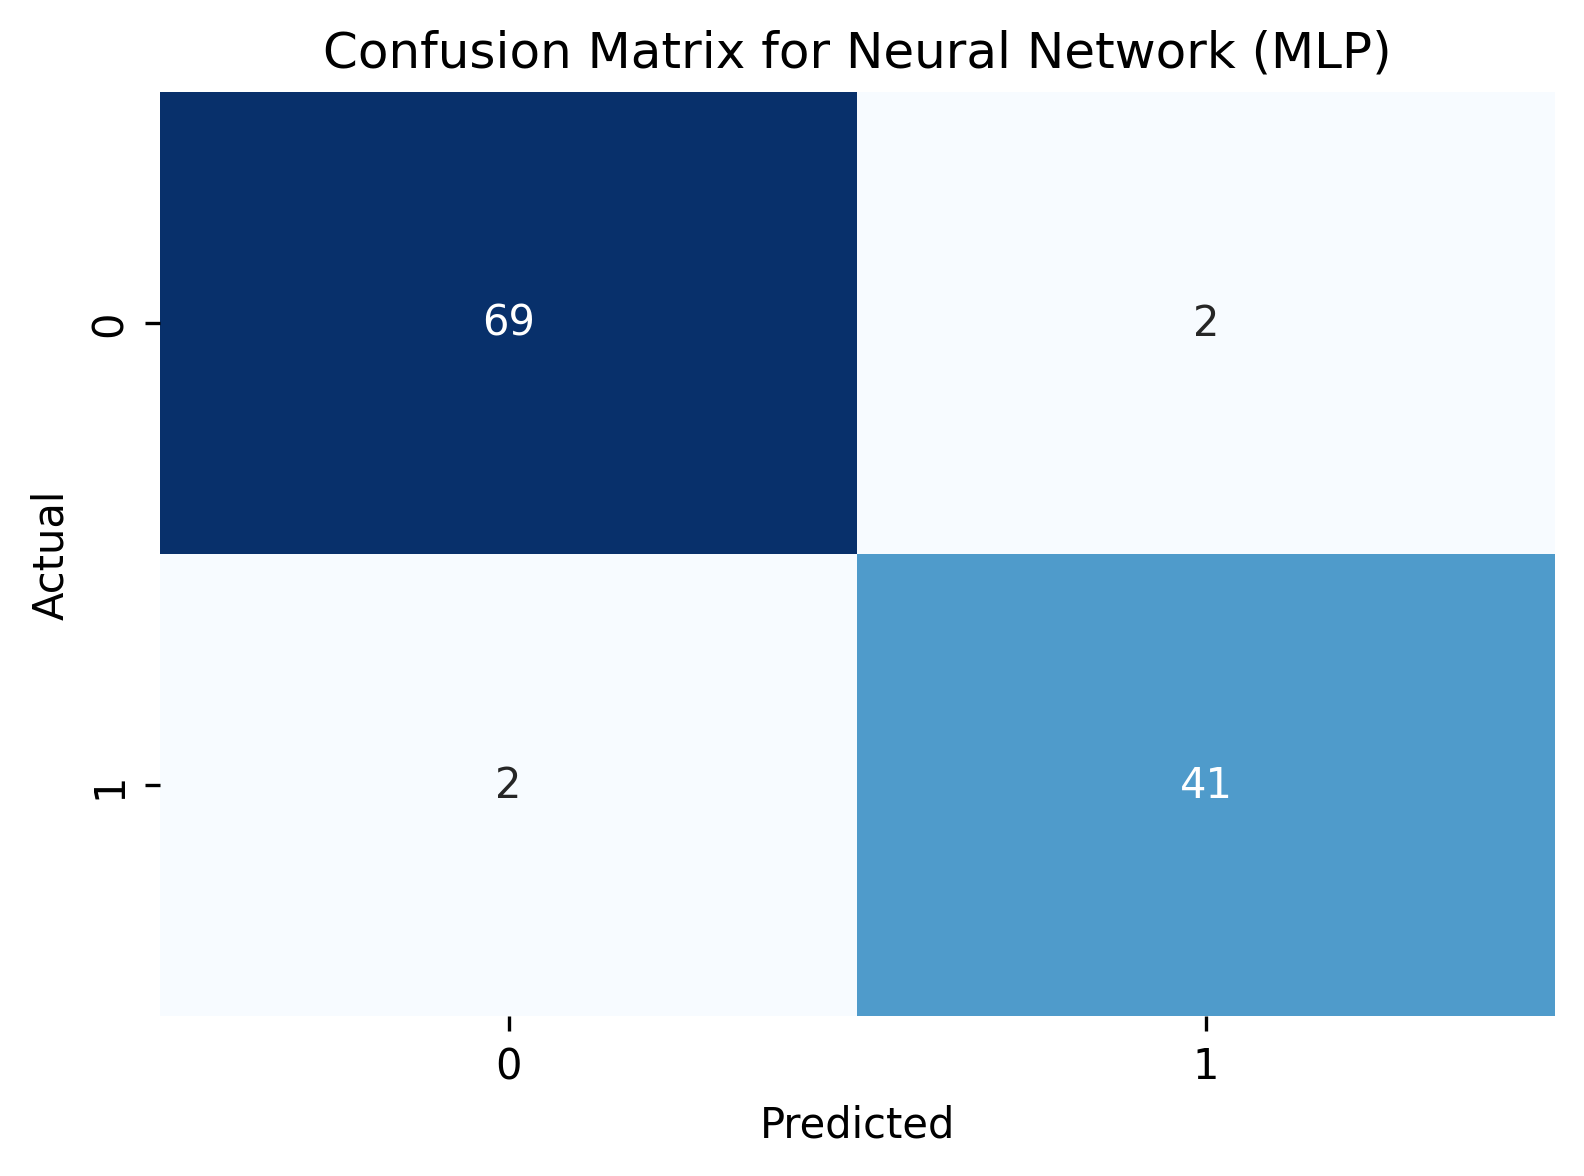


Training AdaBoost

AdaBoost Results:
Accuracy: 0.96
Confusion Matrix:
[[70  1]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



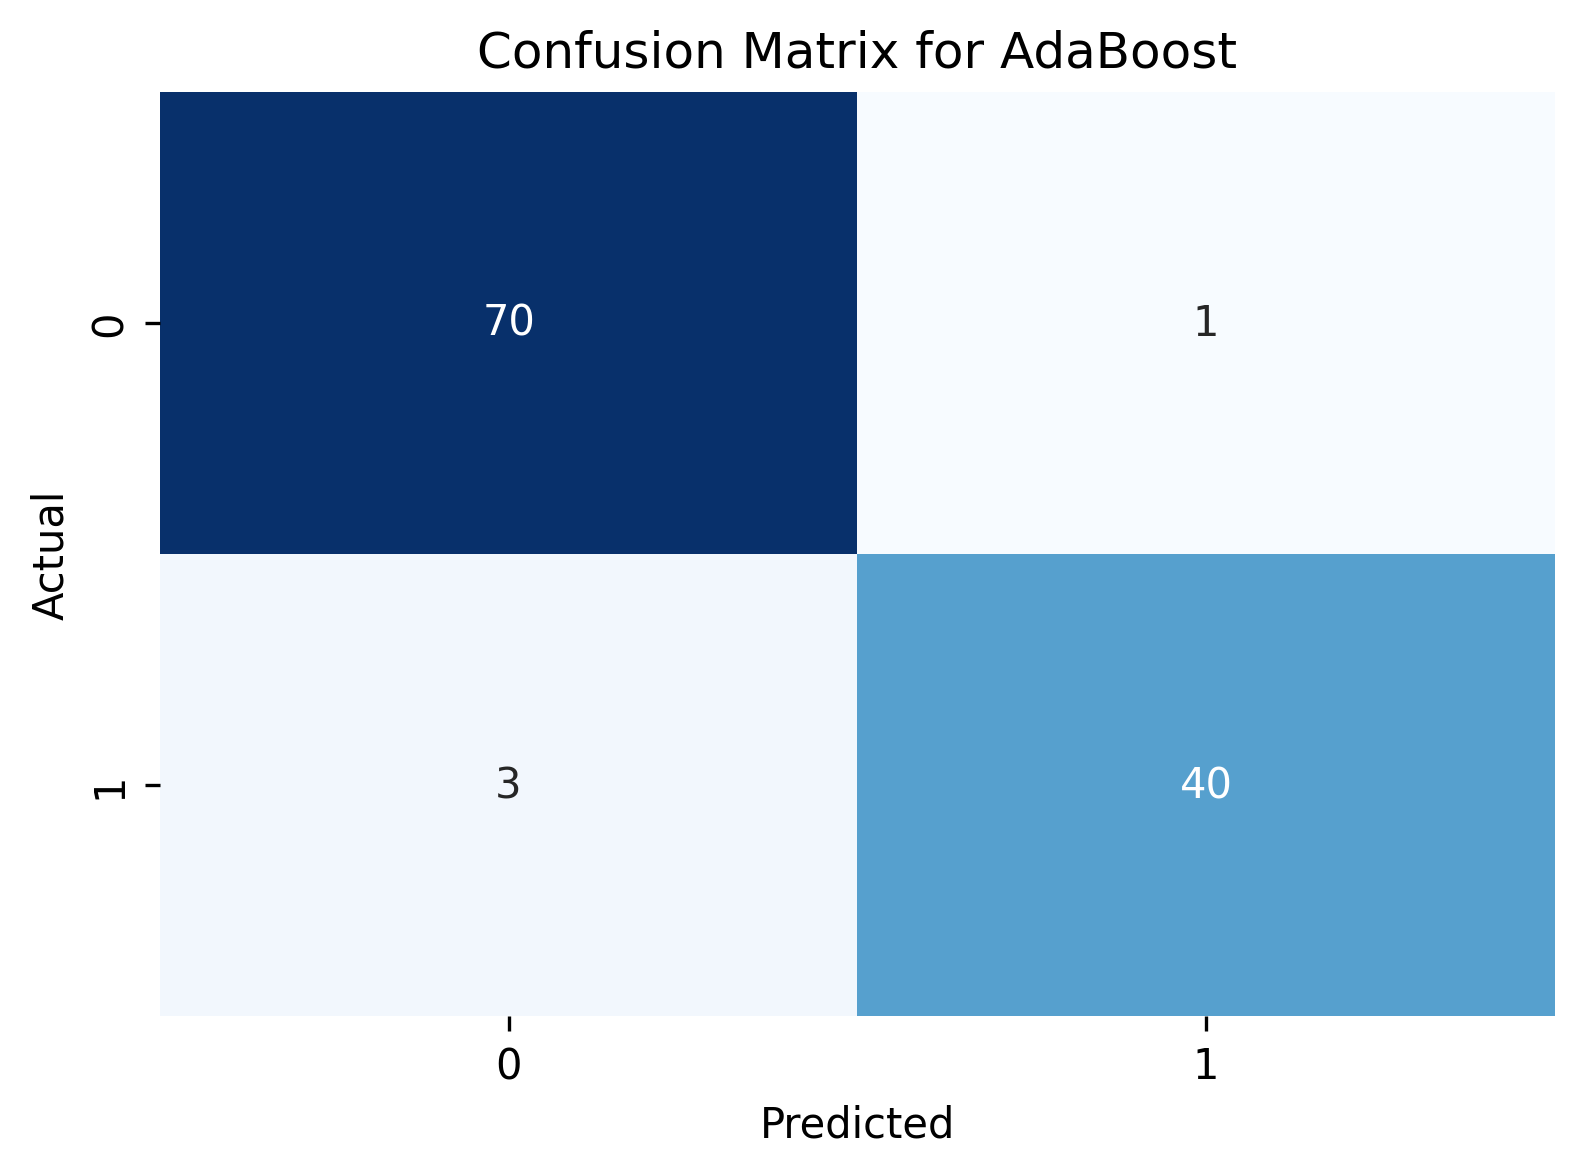


Training Bagging

Bagging Results:
Accuracy: 0.96
Confusion Matrix:
[[69  2]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



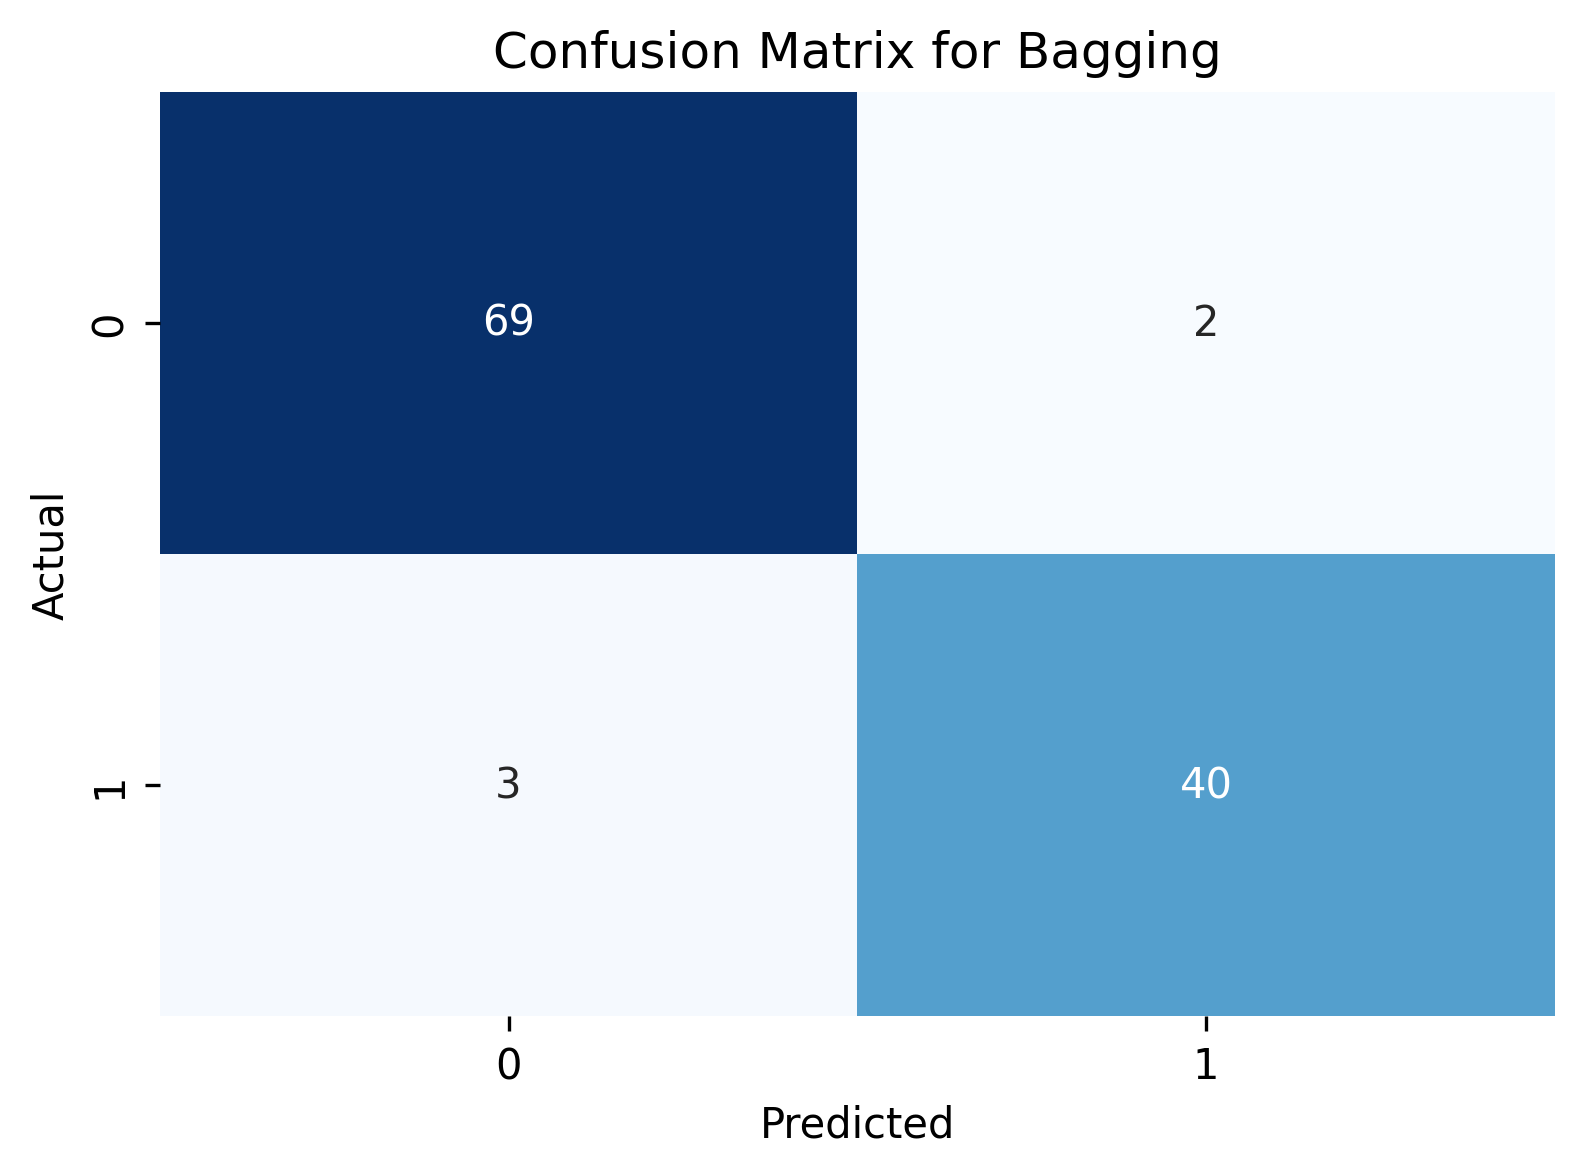


Training HistGradientBoosting

HistGradientBoosting Results:
Accuracy: 0.97
Confusion Matrix:
[[70  1]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



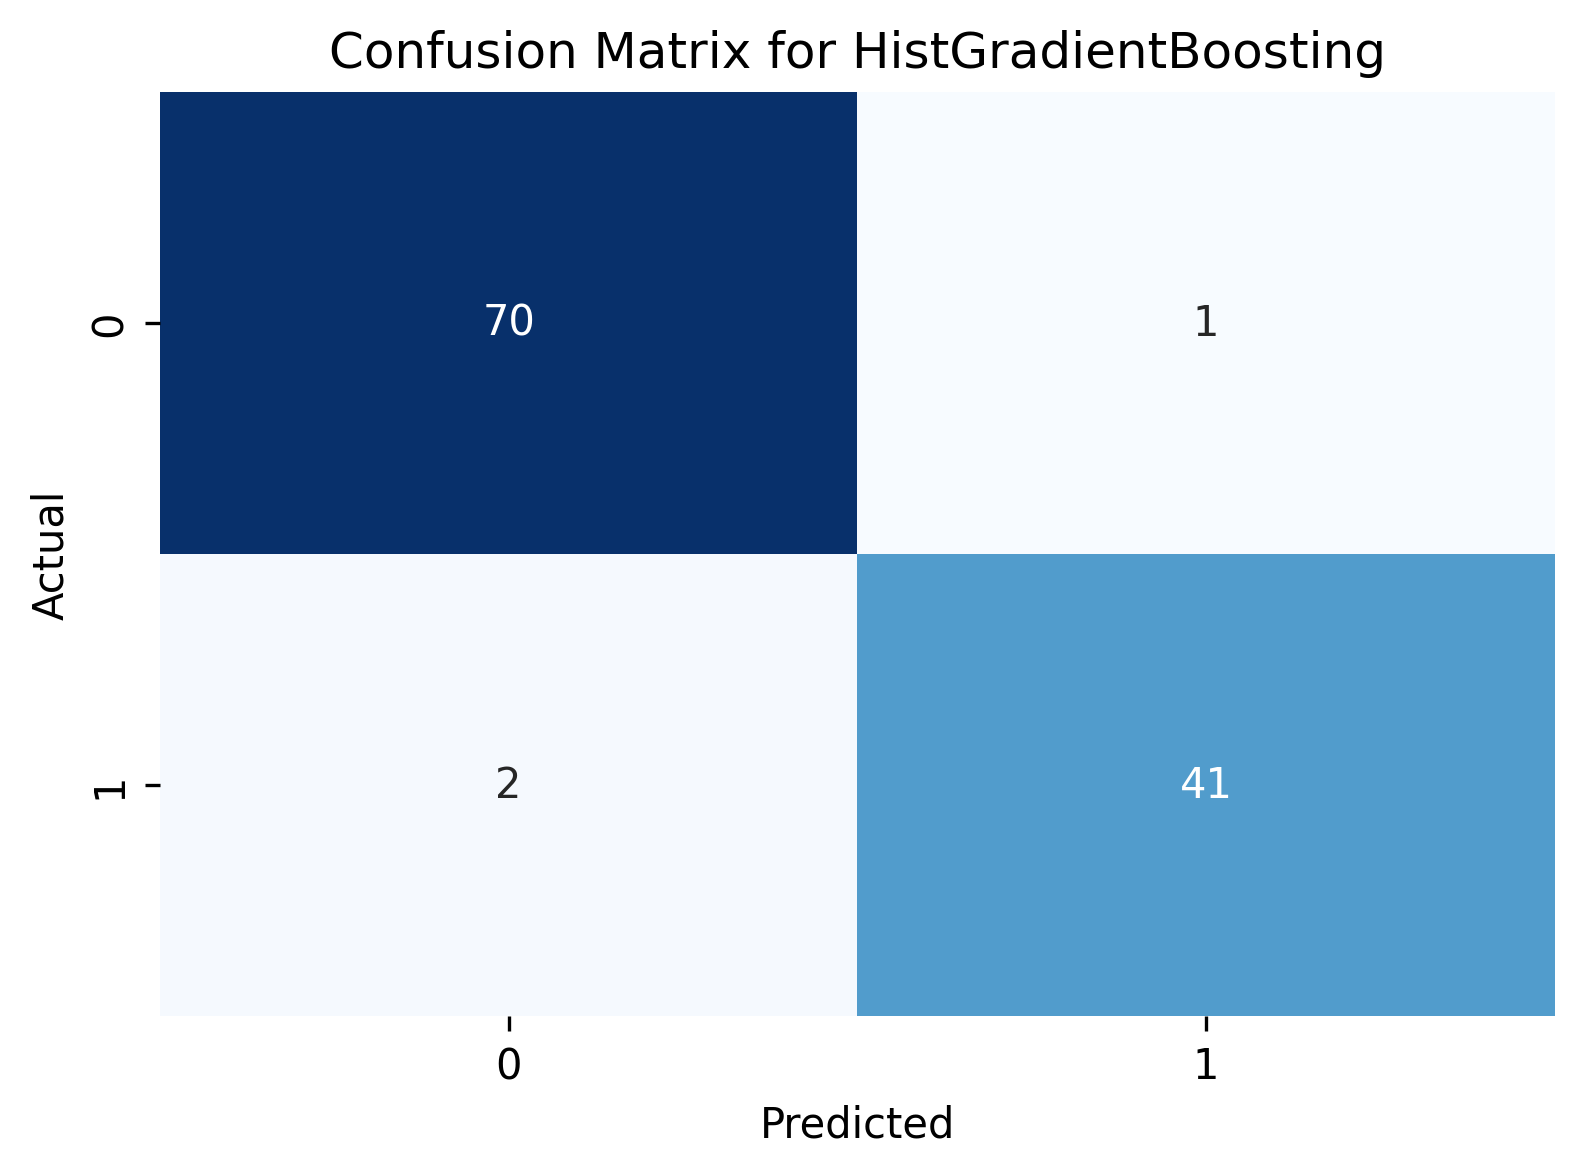


Training Linear Discriminant Analysis

Linear Discriminant Analysis Results:
Accuracy: 0.96
Confusion Matrix:
[[70  1]
 [ 4 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



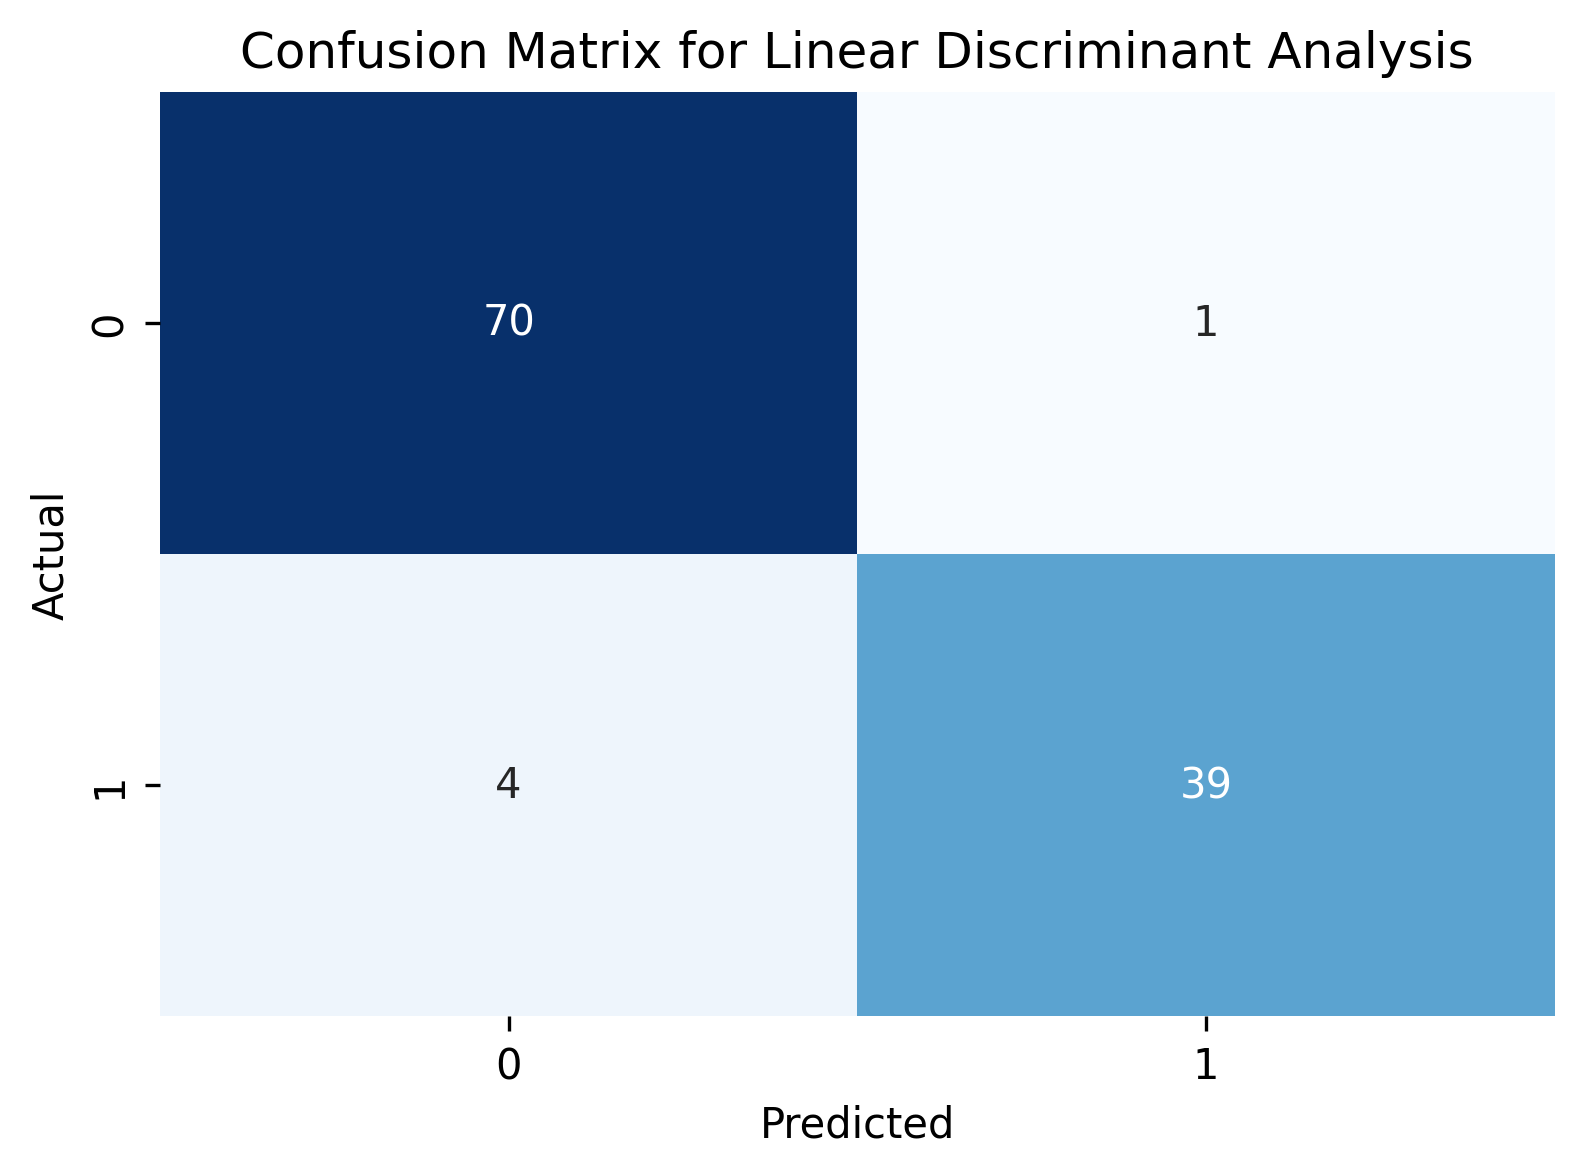

In [61]:
### this is quick way of running base classifiers
### loop grabs each classifier from dictionary(key: value), train, predict on test, plot CM


classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Support Vector Classifier': SVC(),
    'Linear SVM': LinearSVC(max_iter=10000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Network (MLP)': MLPClassifier(random_state=42, max_iter=1000),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis()
}


for name, clf in classifiers.items():
    print(f'\nTraining {name}')
    clf.fit(X_train, y_train)        ### Train model
    y_pred = clf.predict(X_test)     ### Predict on test set

    ### obtain evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f'\n{name} Results:')
    print(f'Accuracy: {accuracy:.2f}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(report)

    ### finally plot confusion matrix
    plt.figure(figsize=(6, 4), dpi=300)  ### added higher dpi for better viz
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Training Logistic Regression

Training Random Forest

Training Gradient Boosting

Training XGBoost

Training Support Vector Classifier

Training Linear SVM

Training Decision Tree

Training K-Nearest Neighbors

Training Naive Bayes

Training Neural Network (MLP)

Training AdaBoost

Training Bagging

Training HistGradientBoosting

Training Linear Discriminant Analysis


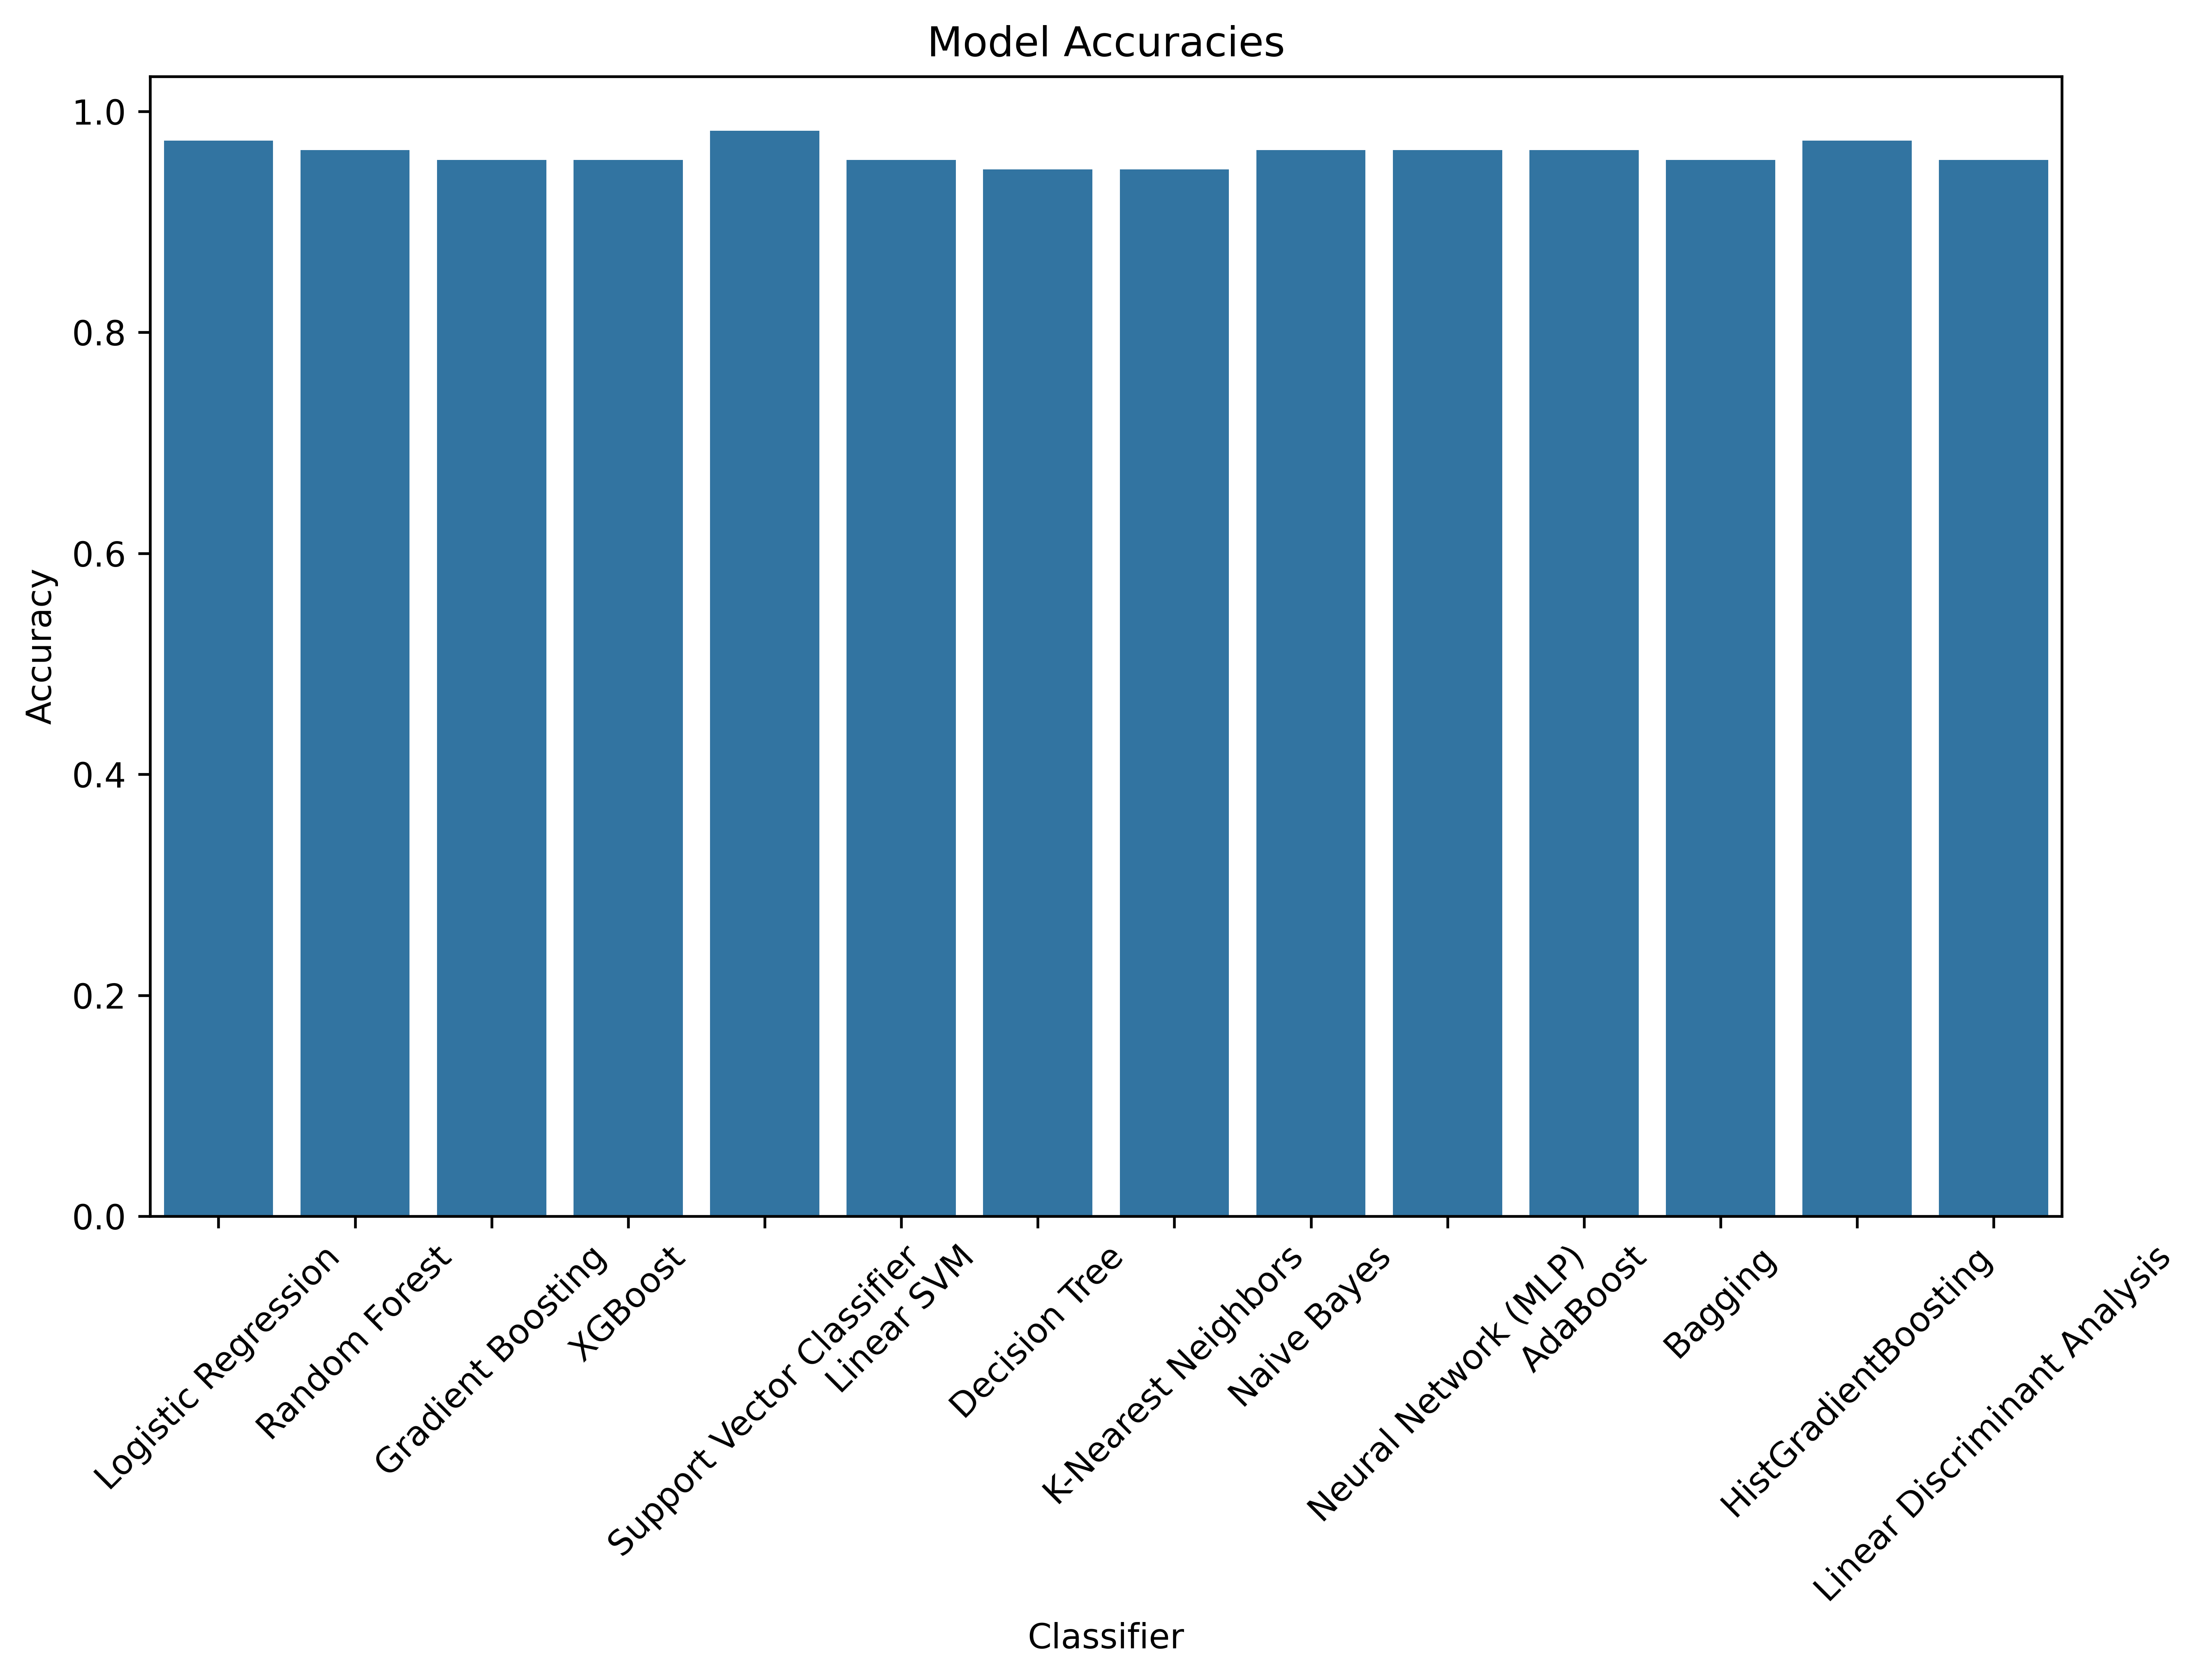

In [62]:
### Dictionary to store accuracy results
accuracy_results = {}

for name, clf in classifiers.items():
    print(f'\nTraining {name}')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy

    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)





### plot accuracies as bar plot
plt.figure(figsize=(10, 6), dpi=600)
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()))
plt.title('Model Accuracies')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

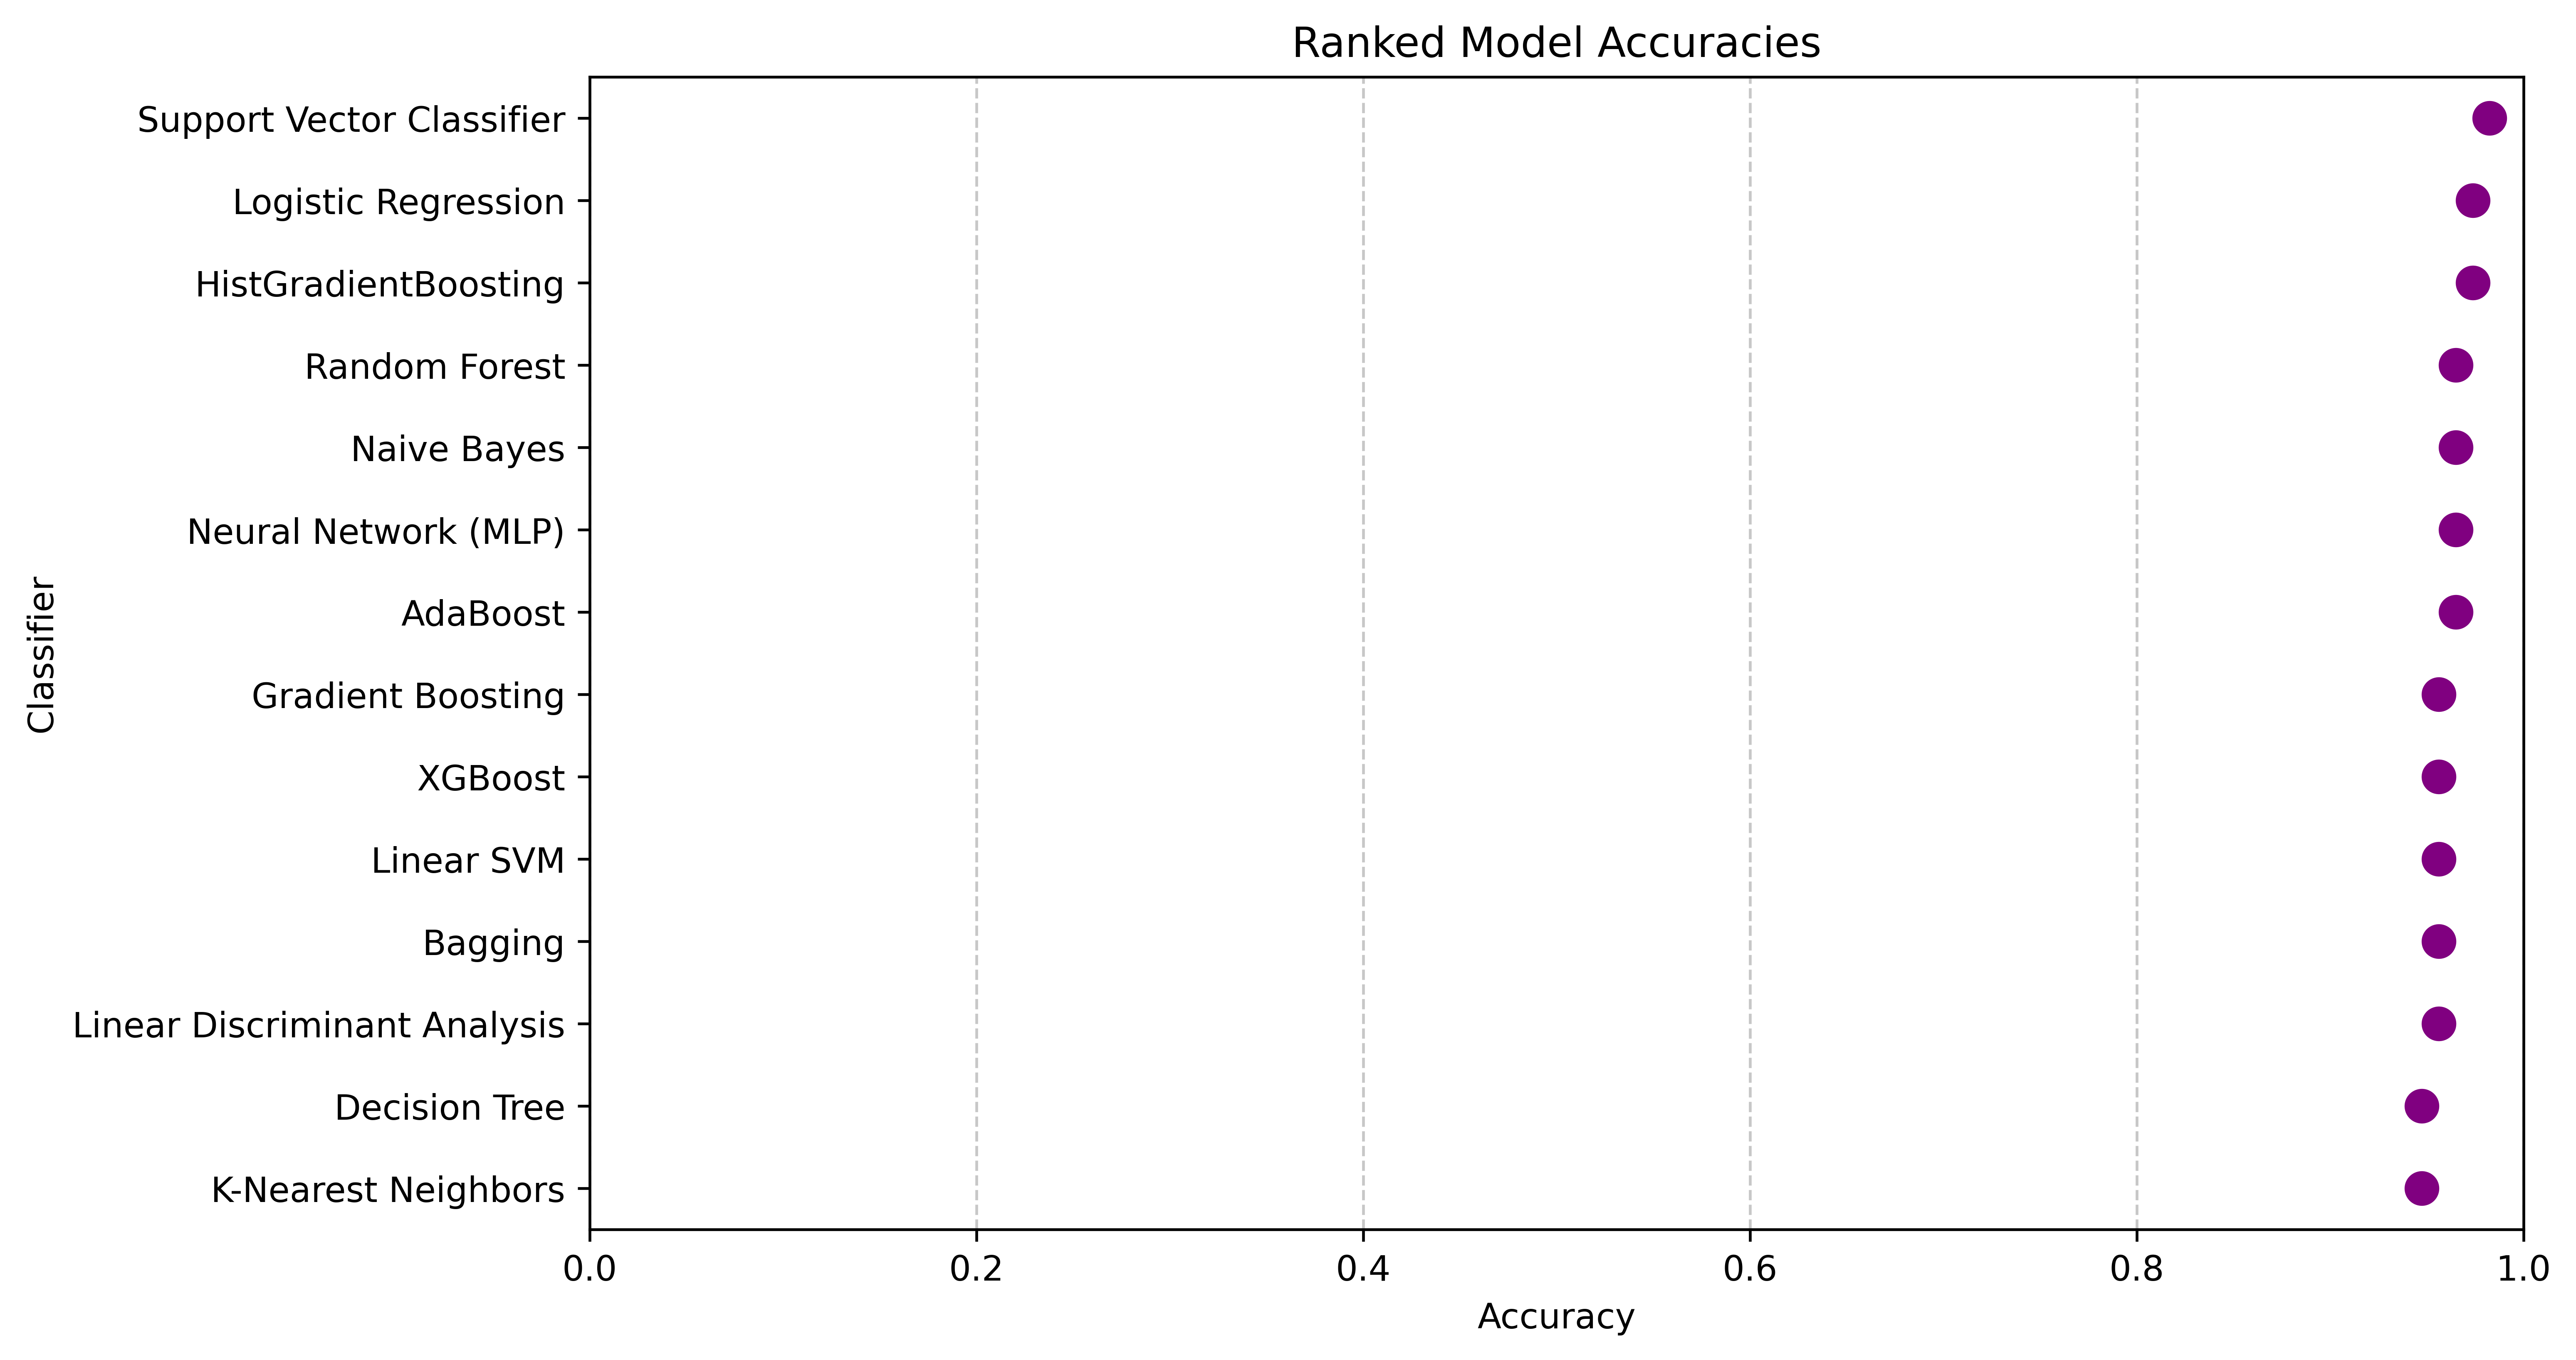

In [63]:
### ranking these models based on their accuracy
plt.figure(figsize=(10, 6), dpi=600)
sorted_results = sorted(accuracy_results.items(), key=lambda x: x[1], reverse=True)
sns.stripplot(
    x=[item[1] for item in sorted_results],
    y=[item[0] for item in sorted_results],
    size=10, color='purple'
)
plt.title('Ranked Model Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Classifier')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

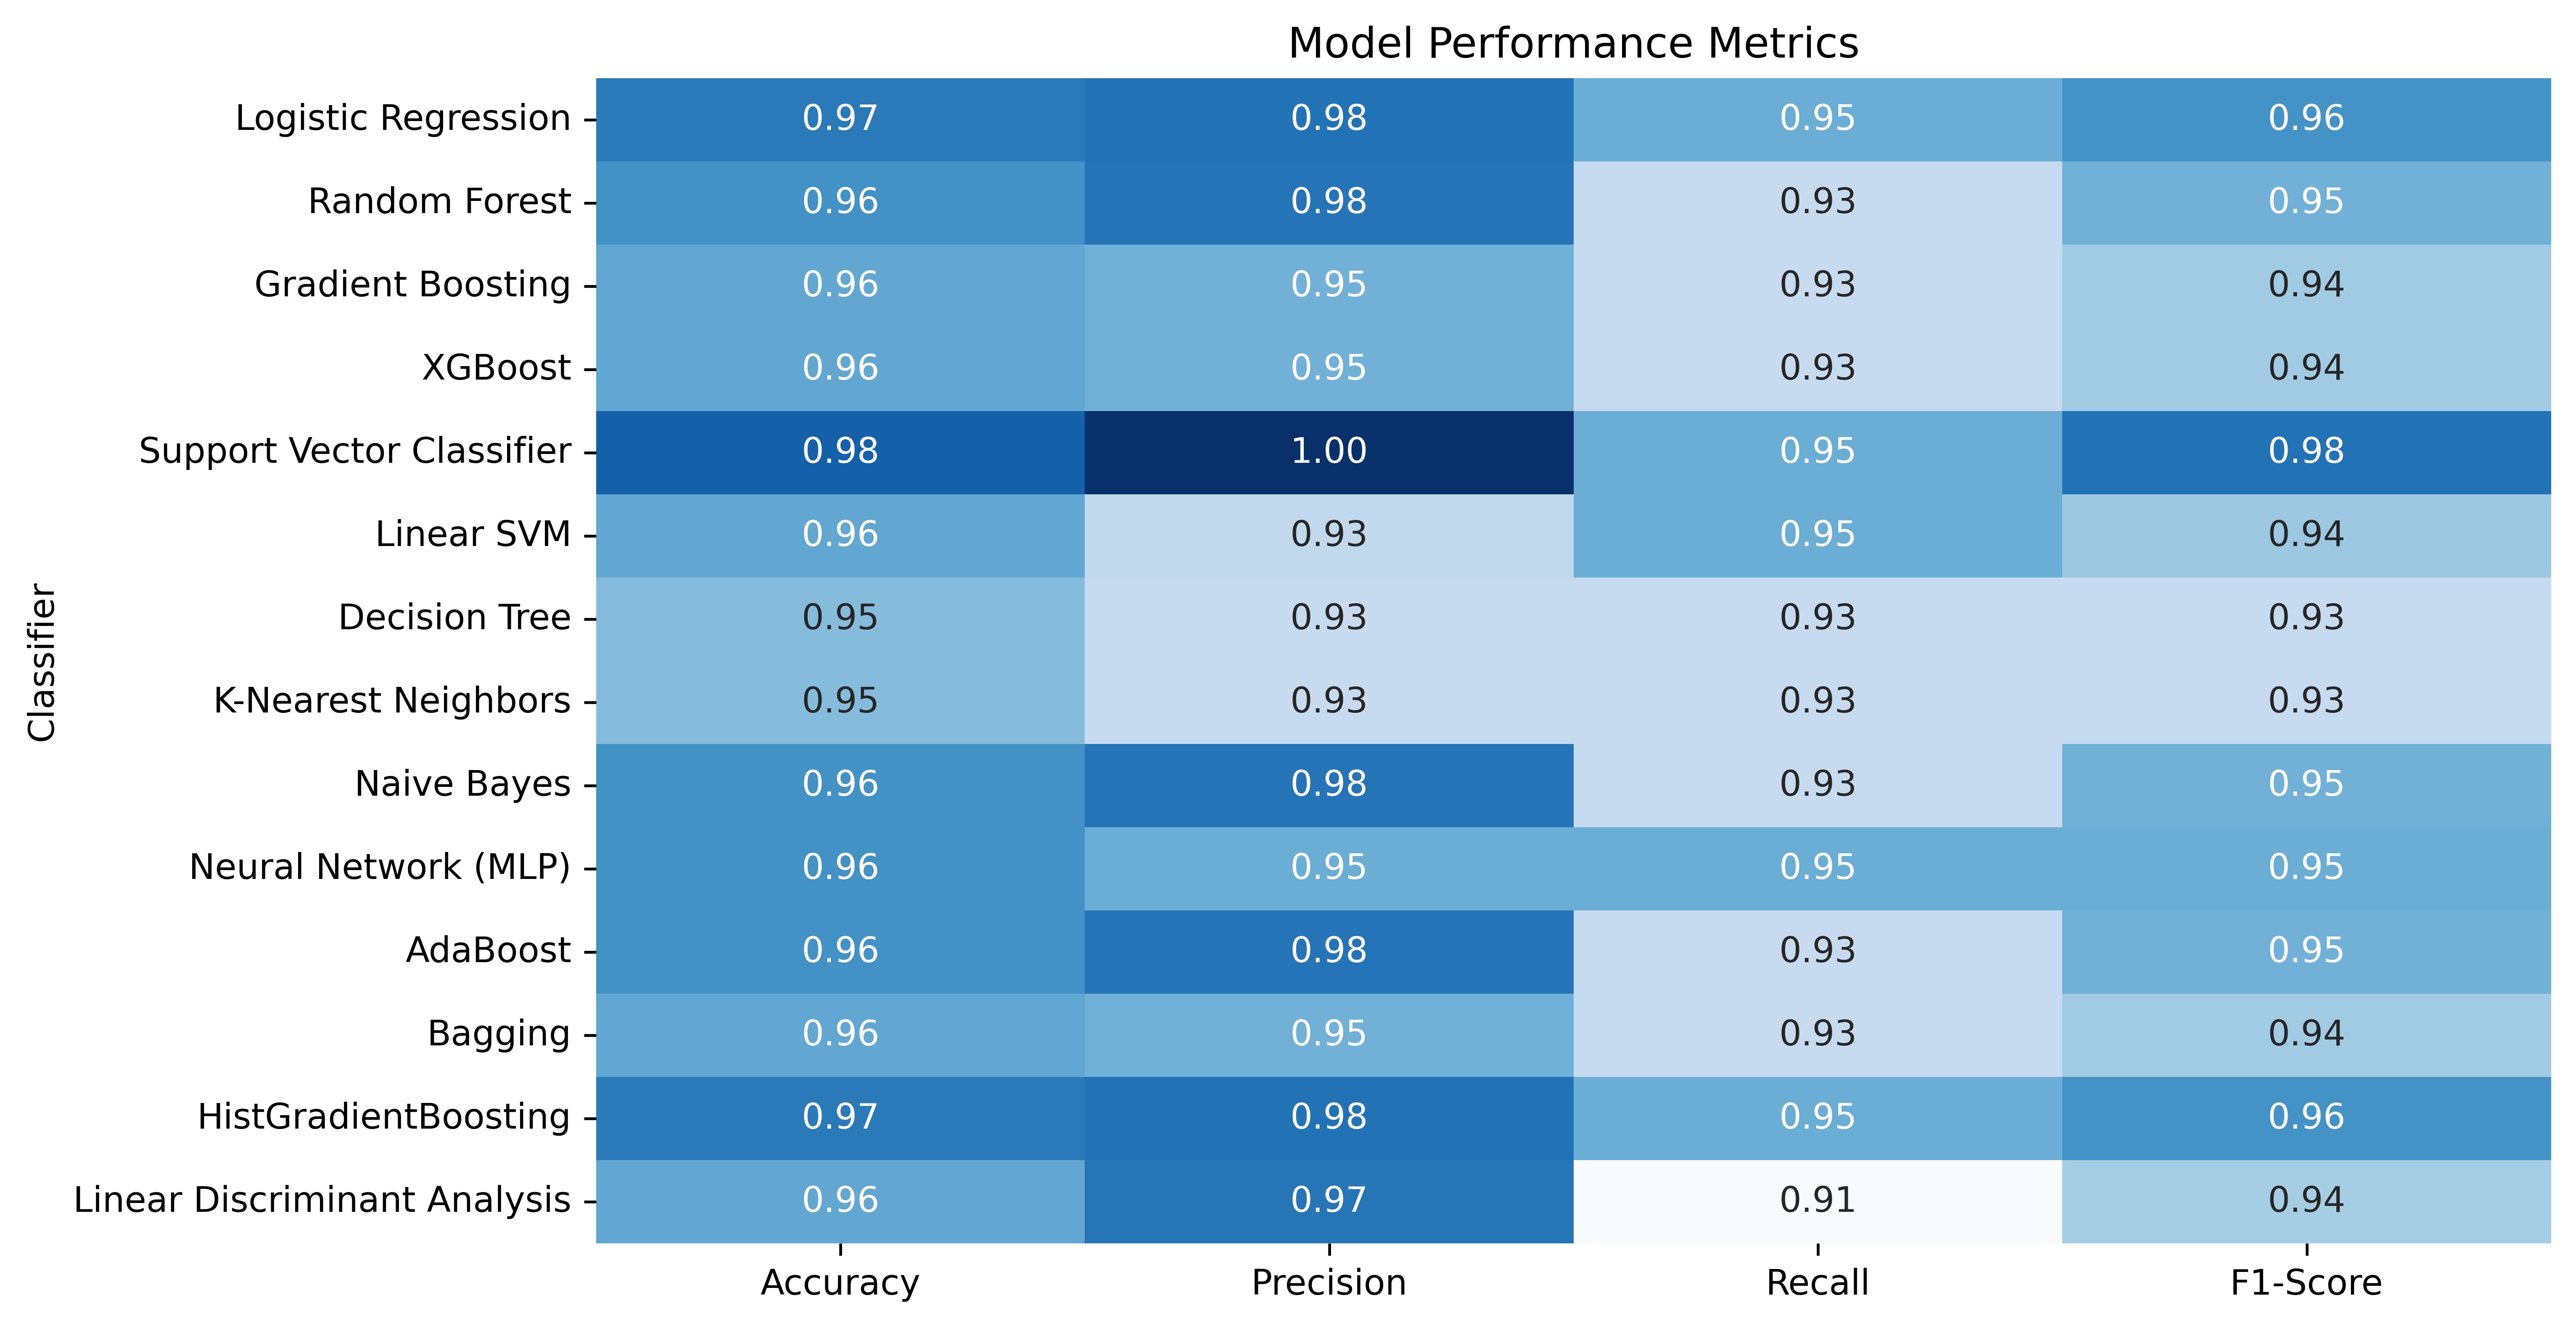

In [64]:
### obtain metrics from models
metrics_results = {
    "Classifier": list(accuracy_results.keys()),
    "Accuracy": list(accuracy_results.values()),
    "Precision": [precision_score(y_test, clf.predict(X_test)) for clf in classifiers.values()],
    "Recall": [recall_score(y_test, clf.predict(X_test)) for clf in classifiers.values()],
    "F1-Score": [f1_score(y_test, clf.predict(X_test)) for clf in classifiers.values()]
}

### Convert to DataFrame and plot heatmap
metrics_df = pd.DataFrame(metrics_results).set_index("Classifier")
plt.figure(figsize=(10, 6), dpi=600)
sns.heatmap(metrics_df, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title('Model Performance Metrics')
plt.show()

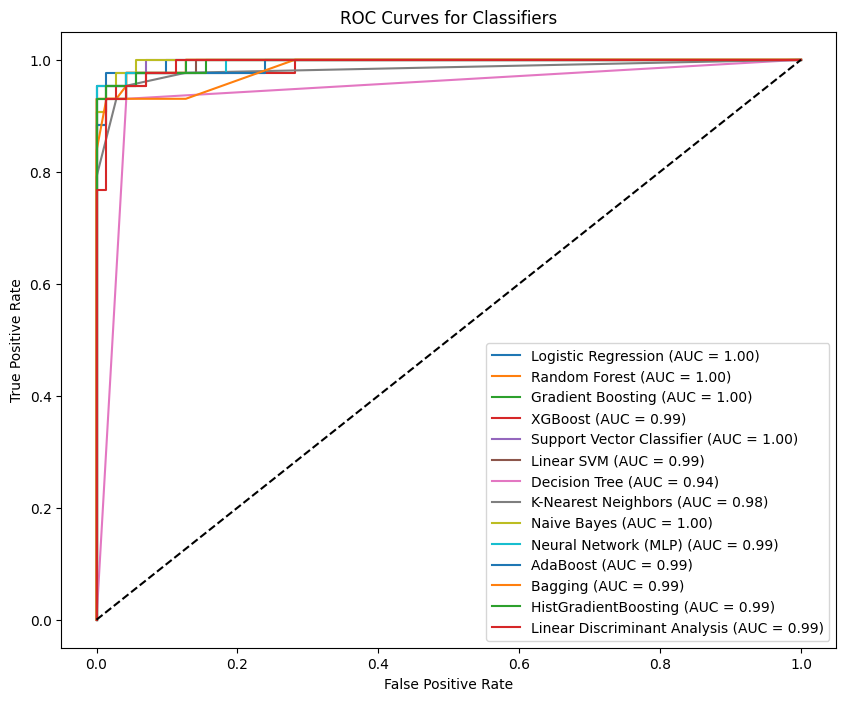

In [65]:
### AUC for classifiers
plt.figure(figsize=(10, 8))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)[:, 1]
    else:
        y_score = clf.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classifiers')
plt.legend(loc='lower right')
plt.show()

## Hyperparameter Optimization


Tuning hyperparameters for Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}

Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

Tuning hyperparameters for Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

Tuning hyperparameters for Support Vector Classifier...
Best parameters for Support Vector Classifier: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Tuning hyperparameters for Linear SVM...
Best parameters for Linear SVM: {'C': 0.1, 'penalty': 'l2'}

Tuning hyperparameters for Decision Tree...
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 10}

Tuning hyperparameters for K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'n_neighbors': 7, 'weights': 'distance'}

No hyperparameter tuning for Naive Bayes, using default settings.

Tuni

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py", line 700, in fit
    raise NotImplementedError(

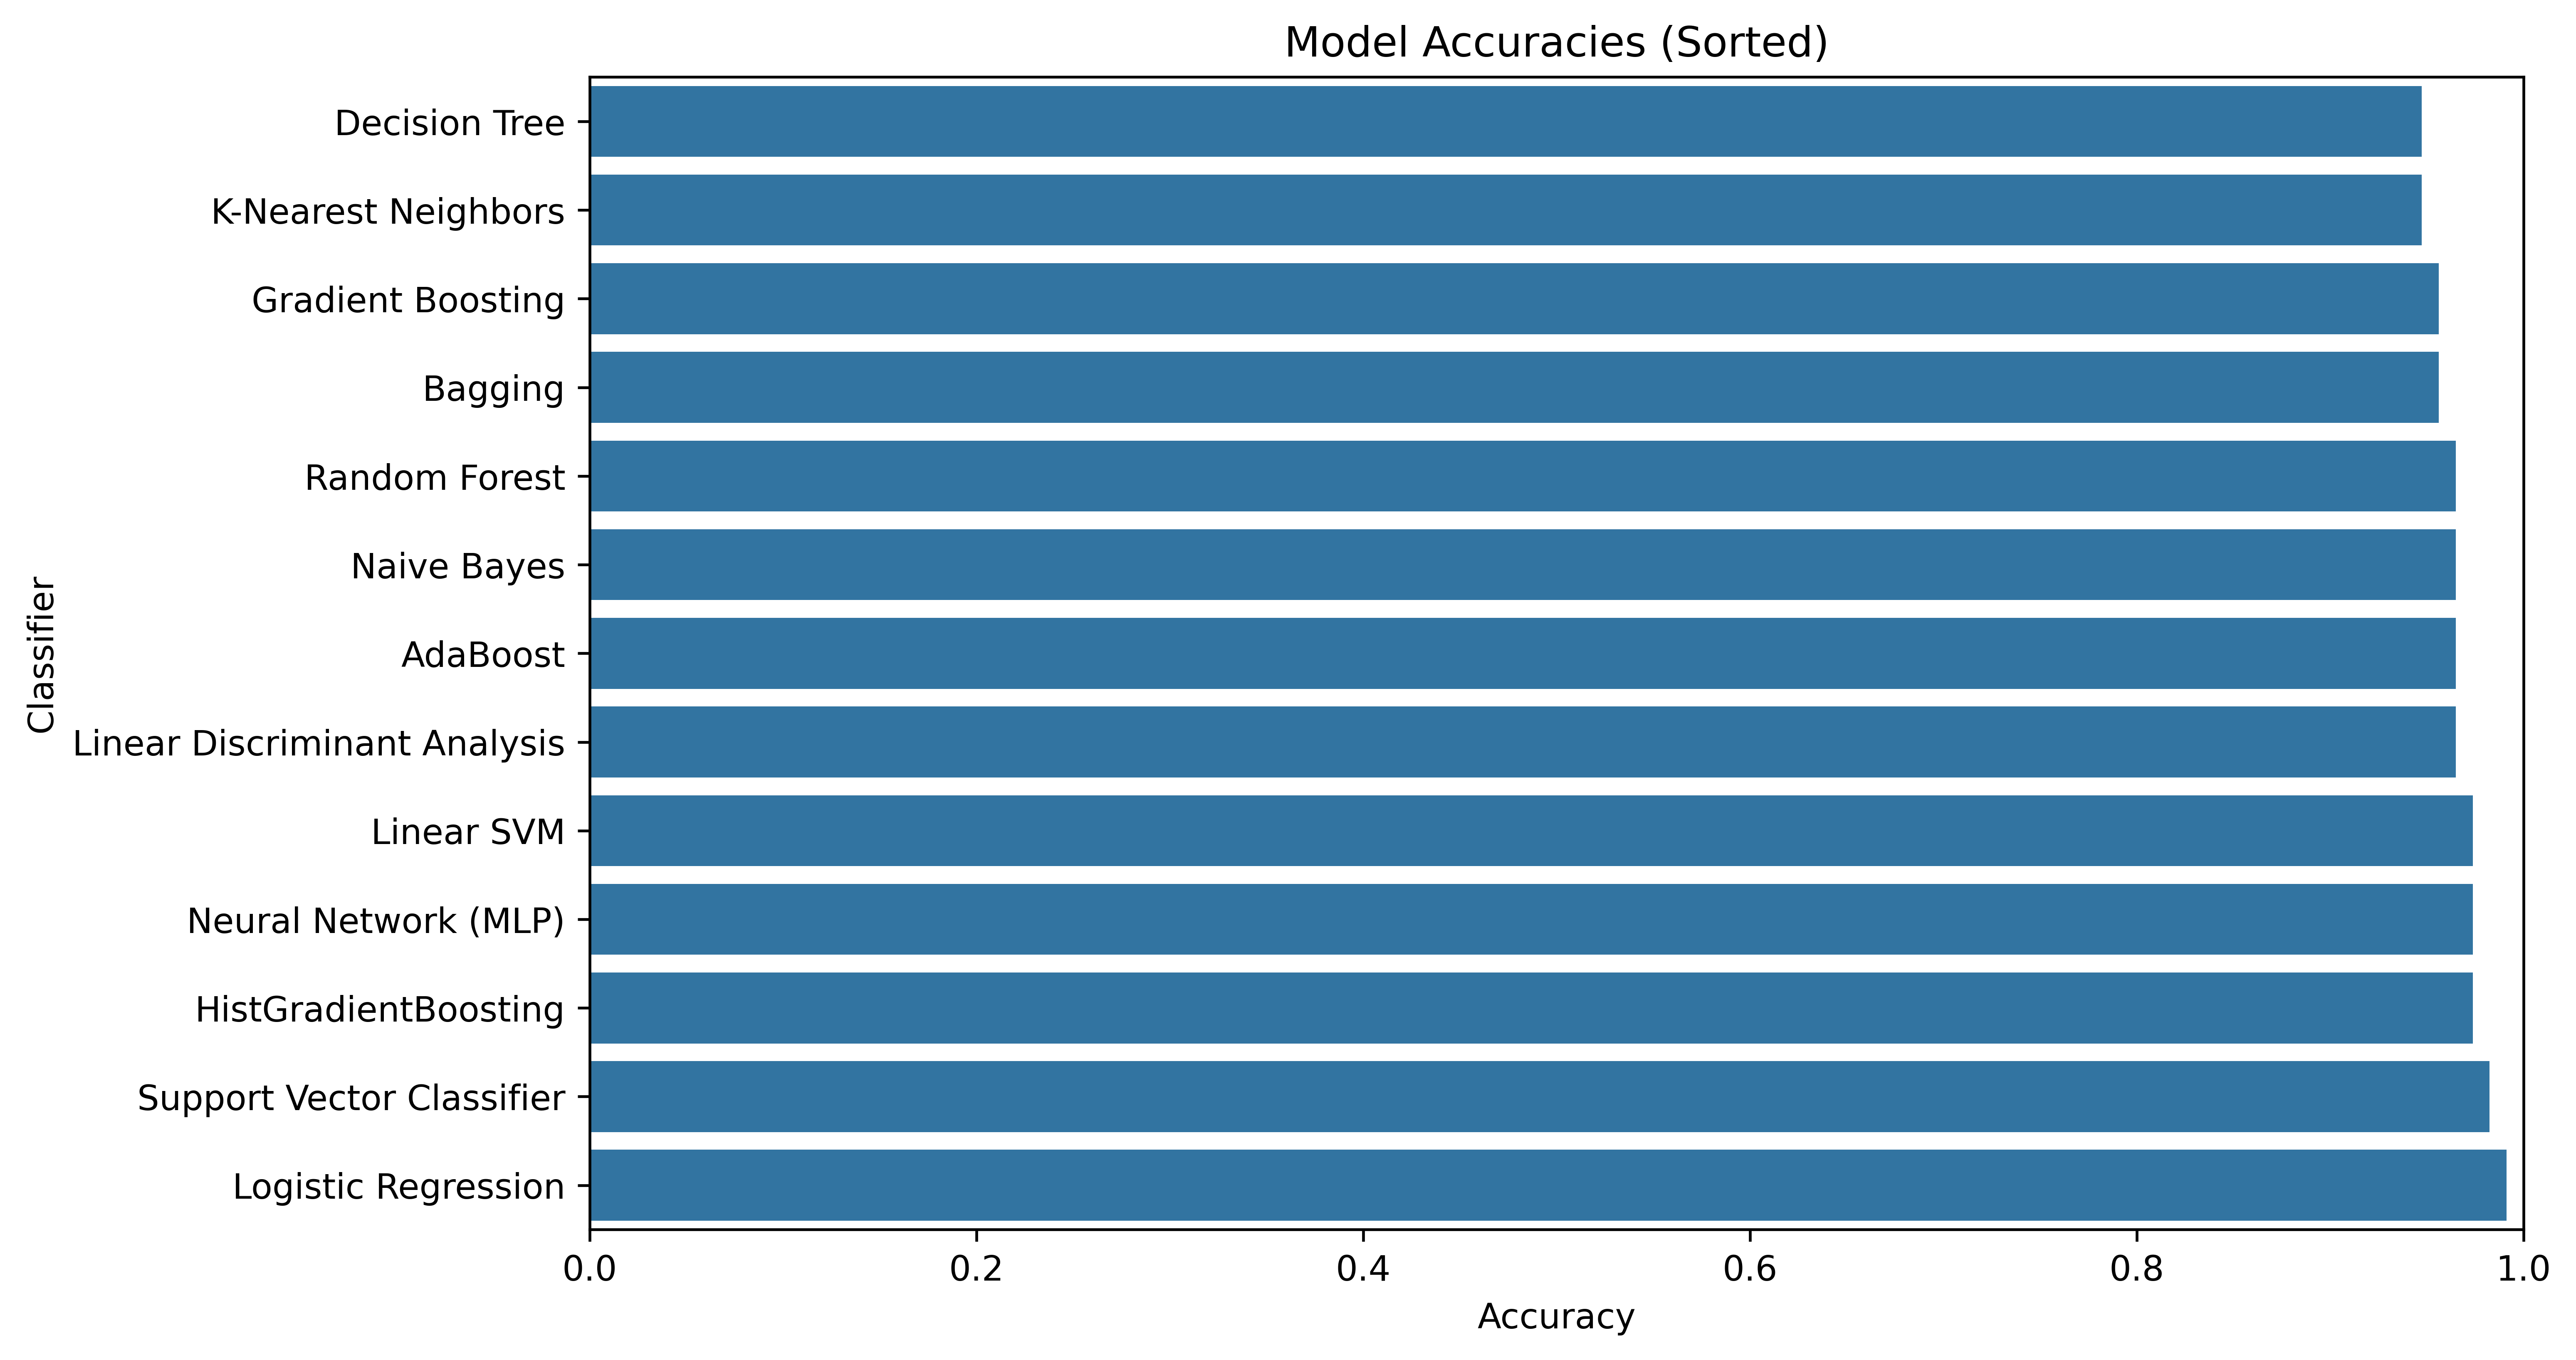

In [66]:
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Classifier': SVC(),
    'Linear SVM': LinearSVC(max_iter=10000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Network (MLP)': MLPClassifier(random_state=42, max_iter=1000),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis()
}

### hyperparameter grids to check
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    },
    'Support Vector Classifier': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Linear SVM': {
        'C': [0.1, 1, 10],
        'penalty': ['l2']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'Neural Network (MLP)': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'learning_rate': ['constant', 'adaptive']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    },
    'Bagging': {
        'n_estimators': [10, 50, 100],
        'max_samples': [0.5, 0.8, 1.0]
    },
    'HistGradientBoosting': {
        'learning_rate': [0.01, 0.1, 0.2],
        'max_iter': [100, 200],
        'max_depth': [None, 10, 20]
    },
    'Linear Discriminant Analysis': {
        'solver': ['svd', 'lsqr'],
        'shrinkage': [None, 'auto']
    }
}

### dictionary to store best classifiers
best_classifiers = {}

### perform hyperparameter tuning
for name, clf in classifiers.items():
    if name in param_grids:
        print(f'\nTuning hyperparameters for {name}...')
        grid_search = GridSearchCV(clf, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_classifiers[name] = grid_search.best_estimator_
        print(f'Best parameters for {name}: {grid_search.best_params_}')
    else:
        print(f'\nNo hyperparameter tuning for {name}, using default settings.')
        best_classifiers[name] = clf
        best_classifiers[name].fit(X_train, y_train)

### evaluate all models
accuracy_results = {}
for name, model in best_classifiers.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy
    print(f'{name} Accuracy: {accuracy:.4f}')

### Visualize accuracies
sorted_results = sorted(accuracy_results.items(), key=lambda x: x[1])
sorted_keys = [item[0] for item in sorted_results]
sorted_values = [item[1] for item in sorted_results]

plt.figure(figsize=(10, 6), dpi=600)
sns.barplot(x=sorted_values, y=sorted_keys, orient='h')
plt.title('Model Accuracies (Sorted)')
plt.xlabel('Accuracy')
plt.ylabel('Classifier')
plt.xlim(0, 1)
plt.show()

                              Accuracy  Precision    Recall  F1-Score
Classifier                                                           
Logistic Regression           0.991228   1.000000  0.976744  0.988235
Random Forest                 0.964912   0.975610  0.930233  0.952381
Gradient Boosting             0.956140   0.952381  0.930233  0.941176
Support Vector Classifier     0.982456   1.000000  0.953488  0.976190
Linear SVM                    0.973684   0.976190  0.953488  0.964706
Decision Tree                 0.947368   0.930233  0.930233  0.930233
K-Nearest Neighbors           0.947368   0.930233  0.930233  0.930233
Naive Bayes                   0.964912   0.975610  0.930233  0.952381
Neural Network (MLP)          0.973684   0.976190  0.953488  0.964706
AdaBoost                      0.964912   0.975610  0.930233  0.952381
Bagging                       0.956140   0.952381  0.930233  0.941176
HistGradientBoosting          0.973684   0.976190  0.953488  0.964706
Linear Discriminant 

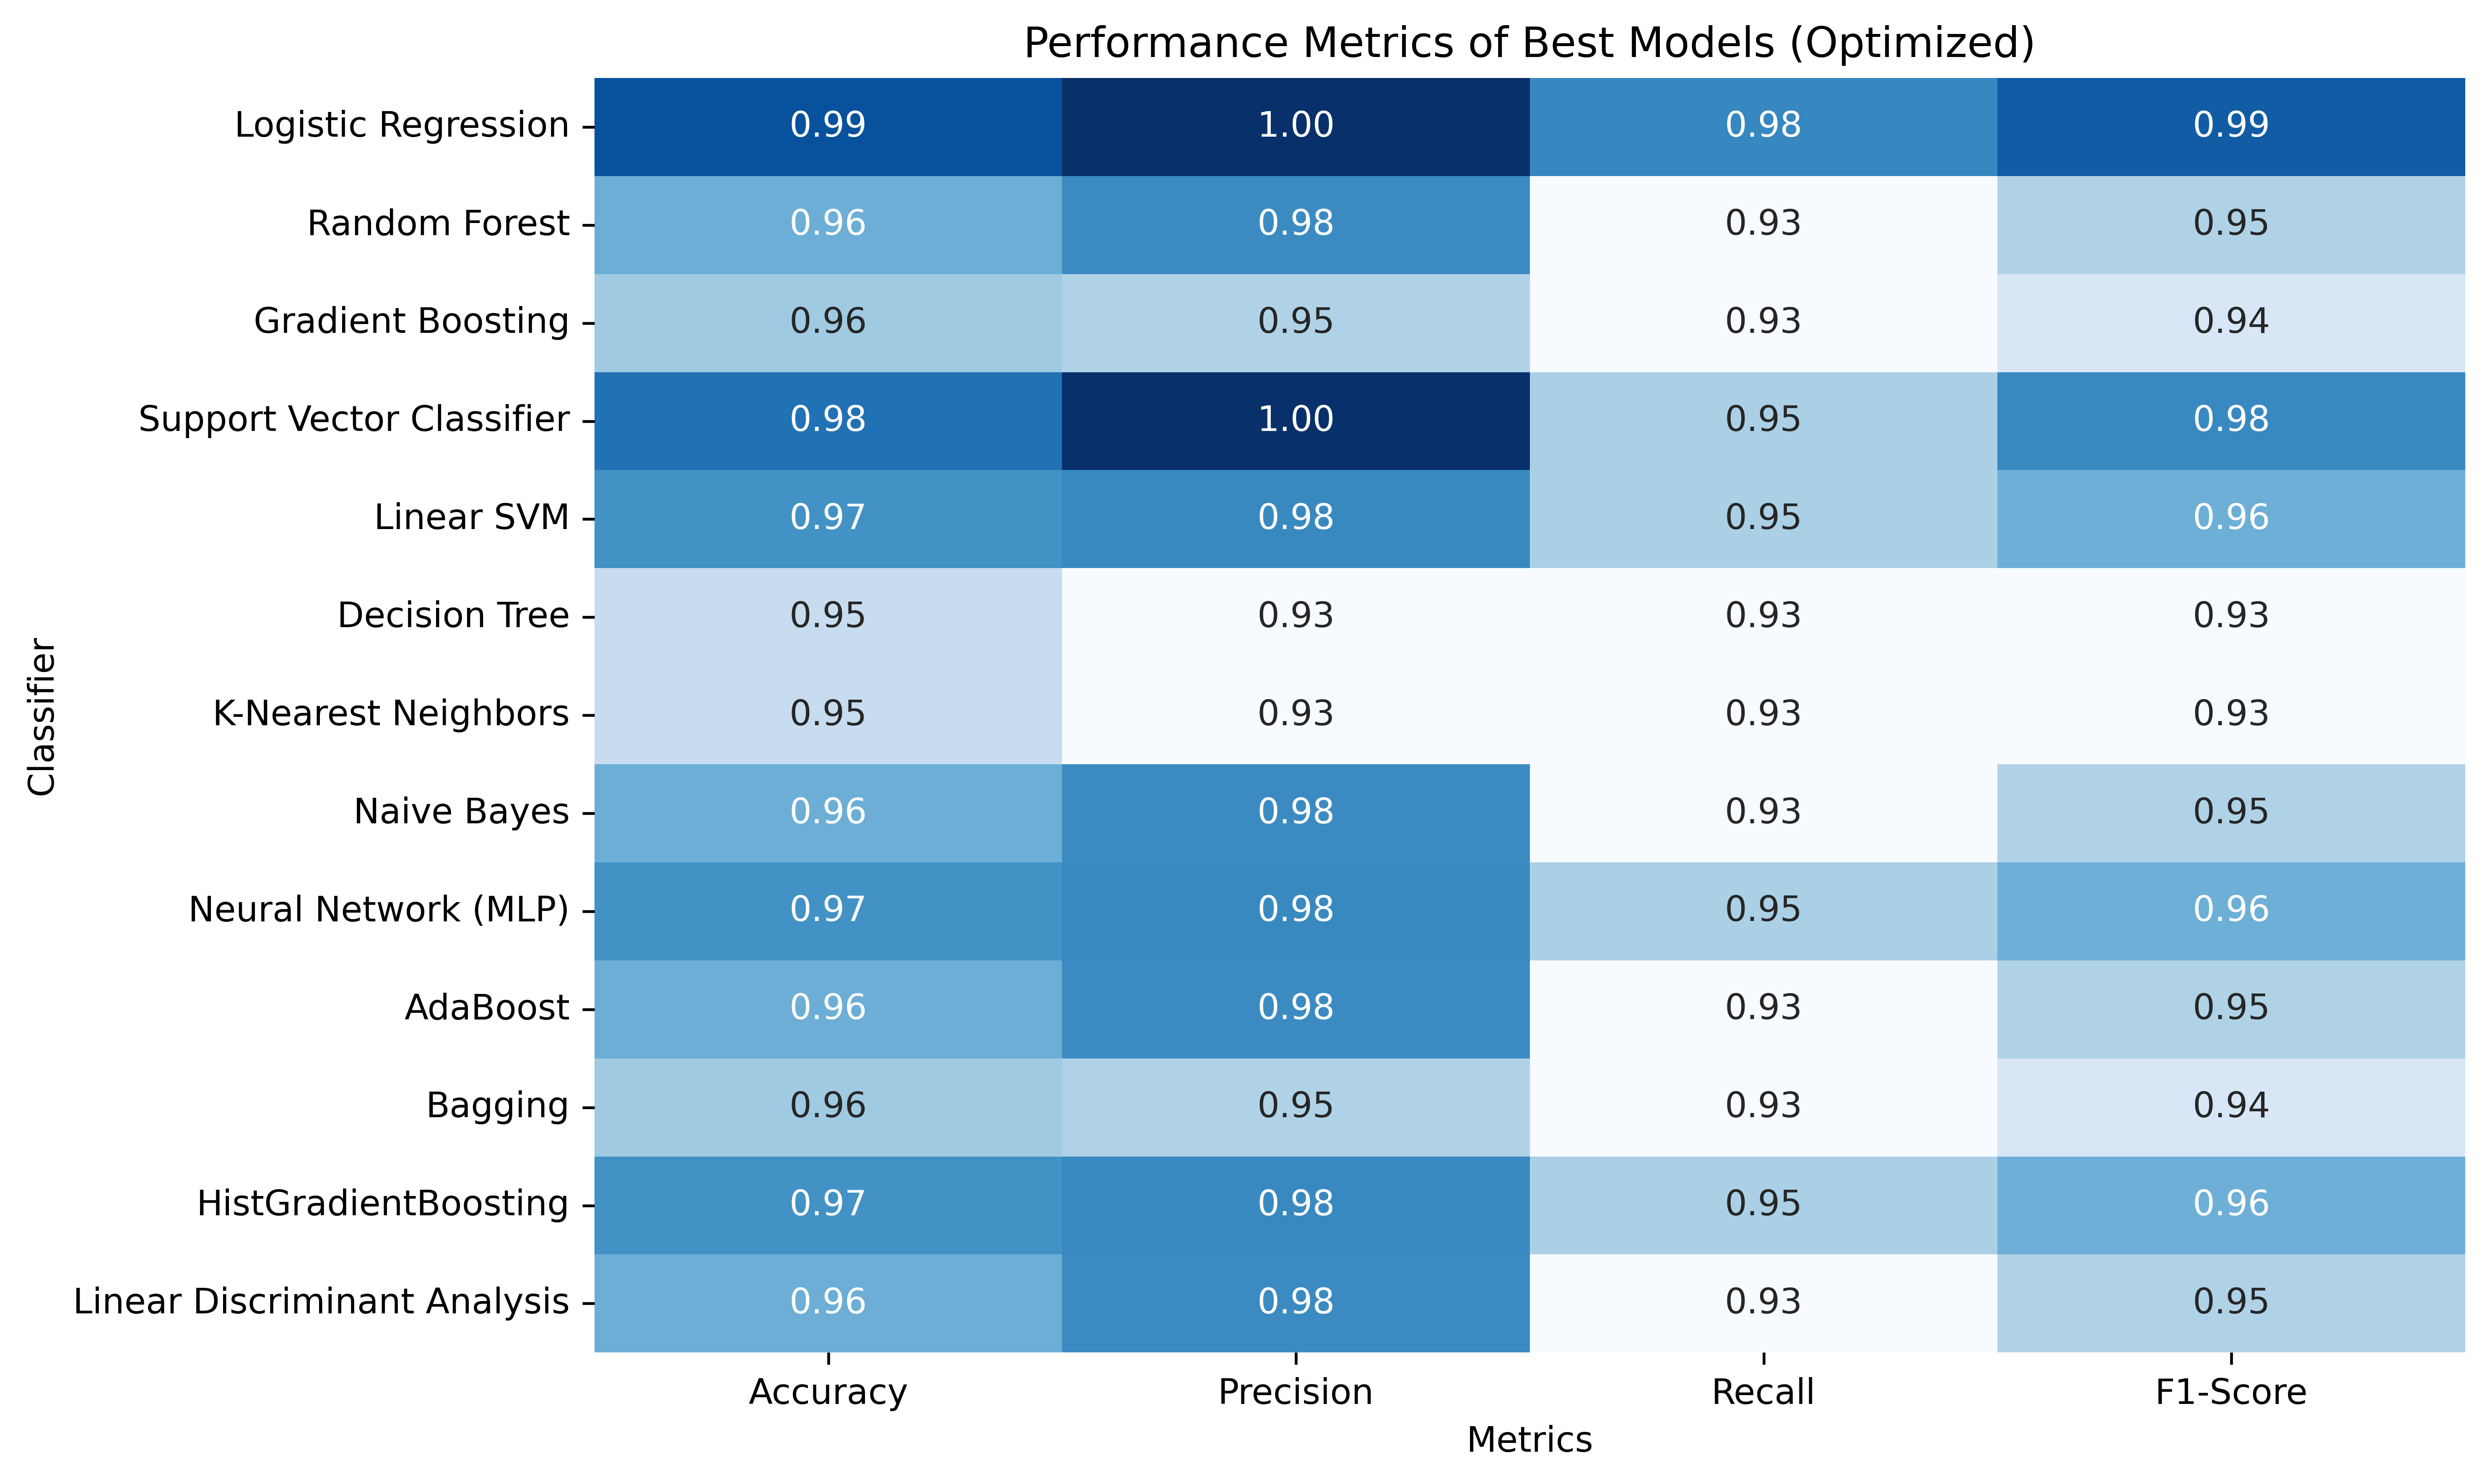

In [67]:
### Viz of Metrics from optimized best classifiers


### compute metrics for best models after optimization
metrics_results = {
    "Classifier": list(best_classifiers.keys()),
    "Accuracy": [accuracy_score(y_test, model.predict(X_test)) for model in best_classifiers.values()],
    "Precision": [precision_score(y_test, model.predict(X_test), zero_division=0) for model in best_classifiers.values()],
    "Recall": [recall_score(y_test, model.predict(X_test), zero_division=0) for model in best_classifiers.values()],
    "F1-Score": [f1_score(y_test, model.predict(X_test), zero_division=0) for model in best_classifiers.values()]
}

### convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics_results).set_index("Classifier")

### print metrics DataFrame
print(metrics_df)

### visualize metrics as heatmap
plt.figure(figsize=(10, 6), dpi=600)
sns.heatmap(metrics_df, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title('Performance Metrics of Best Models (Optimized)')
plt.xlabel('Metrics')
plt.ylabel('Classifier')
plt.tight_layout()
plt.show()

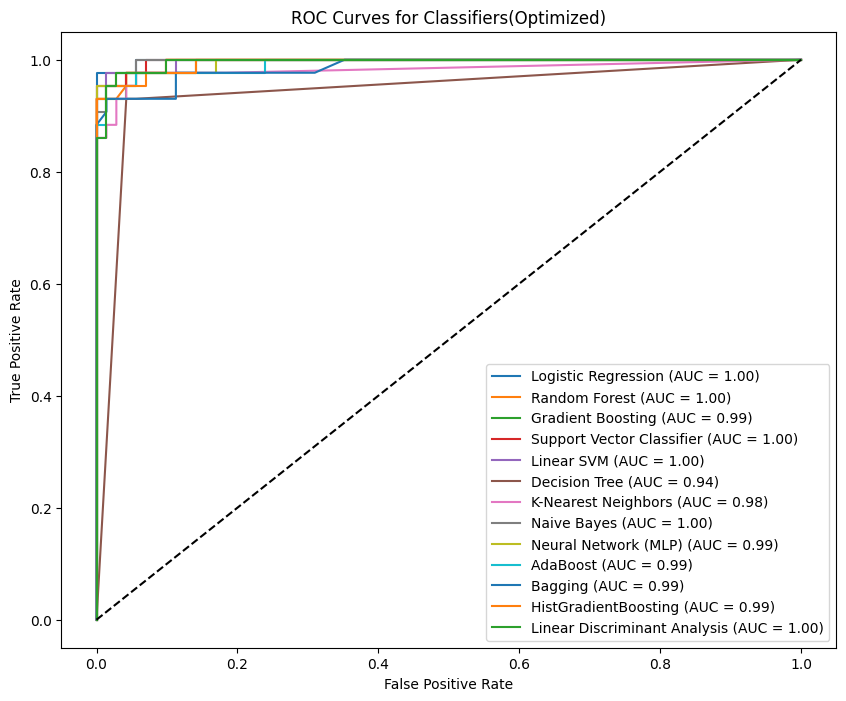

In [68]:
### AUC for best_classifiers from optimization
plt.figure(figsize=(10, 8))

for name, clf in best_classifiers.items():
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)[:, 1]
    else:
        y_score = clf.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classifiers(Optimized)')
plt.legend(loc='lower right')
plt.show()